In [1]:
# %import libraries
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# %loading datasets
train = pd.read_csv("C:/Users/keonyango/Sendy Case Study/Train.csv")
riders = pd.read_csv("C:/Users/keonyango/Sendy Case Study/Riders.csv")

In [4]:
# %inspect the datasets
train.shape , riders.shape

((179867, 21), (2632, 4))

In [5]:
# %preview the train data
train.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,...,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,...,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,...,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,...,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,...,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0


In [6]:
# %preview the riders data
riders.head()

,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,16261,308,21.05,321
1,8832,224,10.00,27
2,53866,238,17.76,25
3,46368,343,24.56,320
4,45609,399,14.97,214


In [7]:
# %checking for missing values
train.isnull().sum().any()

False

In [8]:
# %checking for missing values
riders.isnull().sum().any()

False

In [9]:
# %data informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179867 entries, 0 to 179866
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    179867 non-null  object 
 1   order_id              179867 non-null  int64  
 2   dispatch_day          179867 non-null  int64  
 3   dispatch_day_of_week  179867 non-null  int64  
 4   dispatch_time         179867 non-null  object 
 5   client_id             179867 non-null  int64  
 6   client_type           179867 non-null  object 
 7   order_license_status  179867 non-null  int64  
 8   order_carrier_type    179867 non-null  int64  
 9   vendor_type           179867 non-null  object 
 10  rider_id              179867 non-null  int64  
 11  rider_license_status  179867 non-null  int64  
 12  rider_carrier_type    179867 non-null  int64  
 13  rider_amount          179867 non-null  int64  
 14  rider_lat             179867 non-null  float64
 15  

In [10]:
# %inspect statistical relationship for numeric features
riders.describe().T

,count,mean,std,min,25%,50%,75%,max
Rider ID,2632.0,73738.323328,28424.105449,805.0,54803.25,74025.500,98376.7500,123694.00
Active Rider Age,2632.0,44.490881,63.154074,0.0,3.00,14.000,62.0000,399.00
Average Partner Rating,2632.0,17.530015,5.185067,1.0,14.44,18.535,21.6625,24.99
Number of Ratings,2632.0,133.109422,118.880935,0.0,33.00,105.500,205.0000,637.00


In [11]:
# %inspect statistical relationship for numeric features
train.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,179867.0,32639.833149,18227.428596,100.000000,16875.000000,32964.000000,48117.000000,6.442700e+04
dispatch_day,179867.0,16.604903,8.528368,1.000000,9.000000,17.000000,24.000000,3.100000e+01
dispatch_day_of_week,179867.0,4.185198,1.683574,1.000000,3.000000,4.000000,6.000000,7.000000e+00
client_id,179867.0,465410.752400,663423.434196,261.000000,75647.000000,143428.000000,593630.000000,2.568456e+06
order_license_status,179867.0,0.239555,0.426813,0.000000,0.000000,0.000000,0.000000,1.000000e+00
order_carrier_type,179867.0,1.619007,0.536552,0.000000,1.000000,2.000000,2.000000,2.000000e+00
rider_id,179867.0,70389.969944,33981.806096,1817.000000,40756.000000,73485.000000,100441.000000,1.236940e+05
rider_license_status,179867.0,0.589936,0.491846,0.000000,0.000000,1.000000,1.000000,1.000000e+00
rider_carrier_type,179867.0,0.868731,0.337695,0.000000,1.000000,1.000000,1.000000,1.000000e+00
rider_amount,179867.0,517.544185,157.385430,200.000000,410.000000,460.000000,570.000000,2.190000e+03


                                             |                                             | [  0%]   00:00 ->…


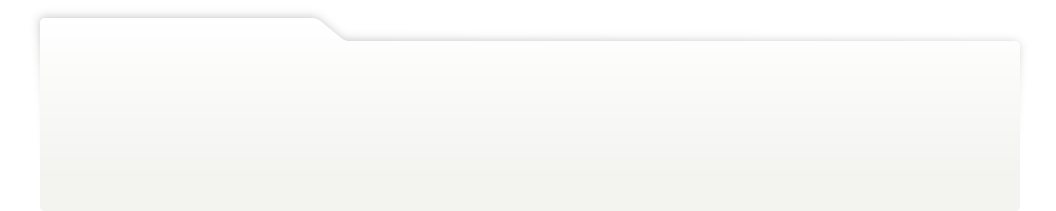
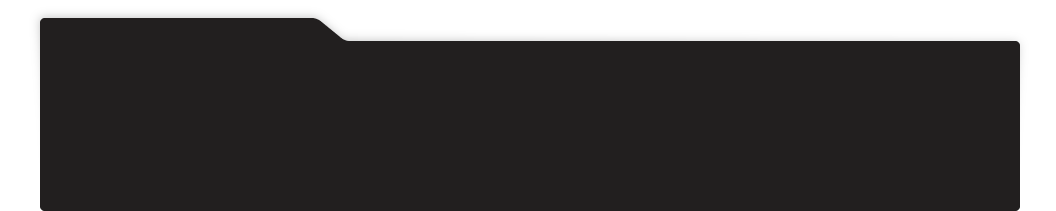
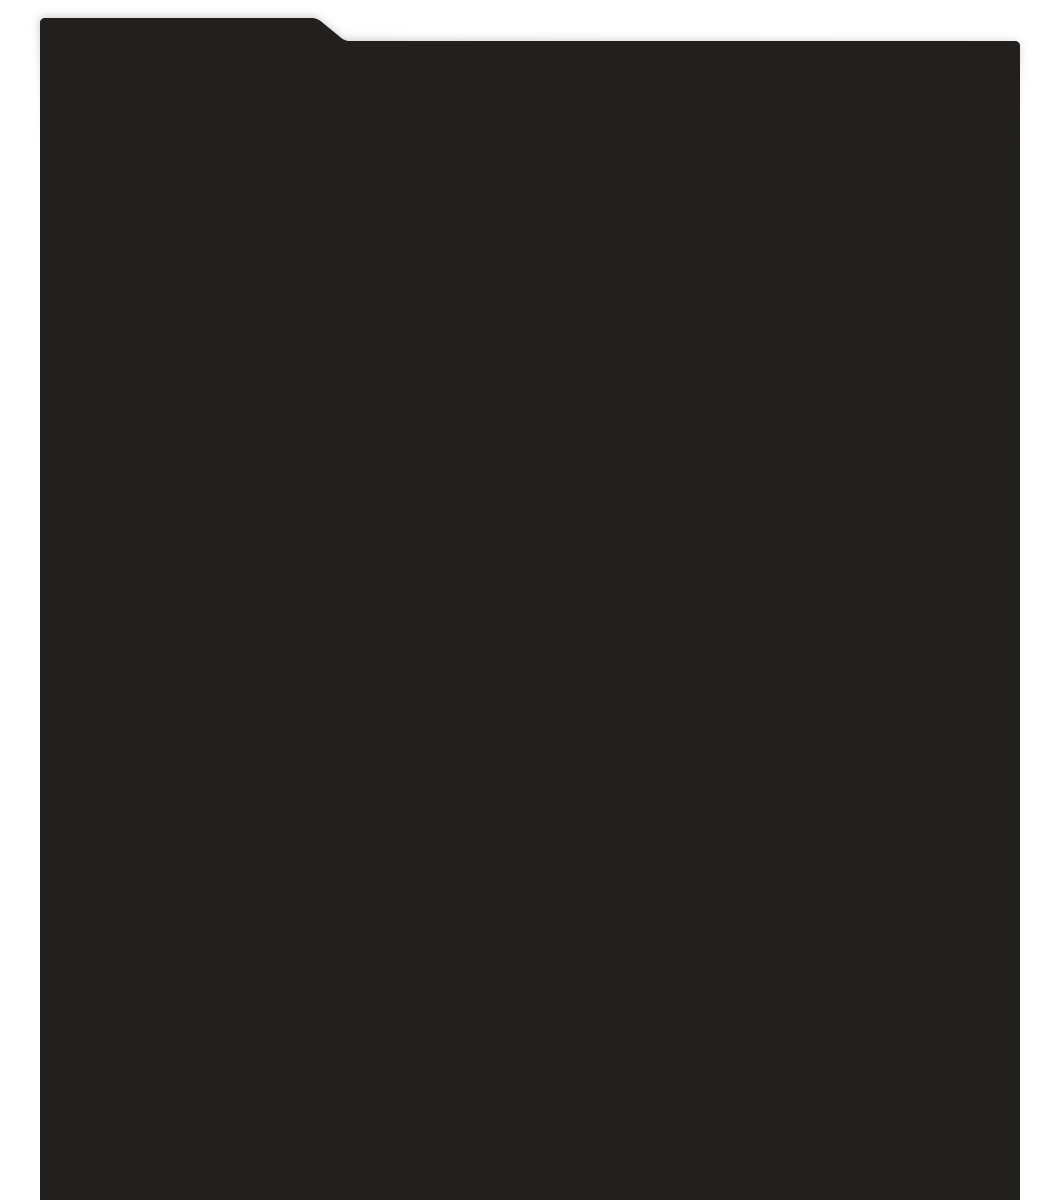
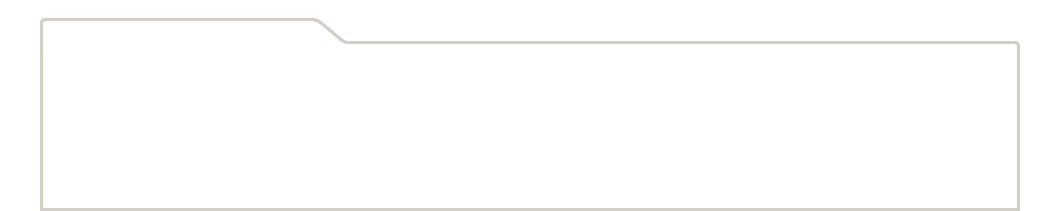
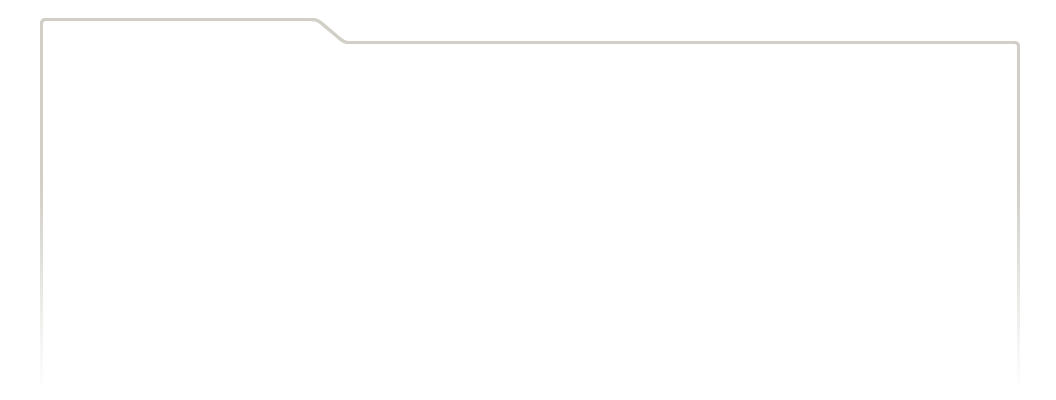
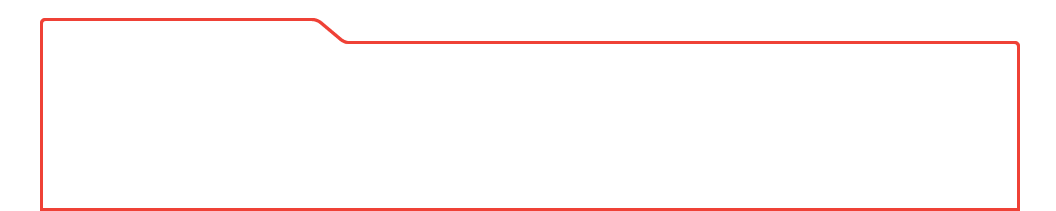
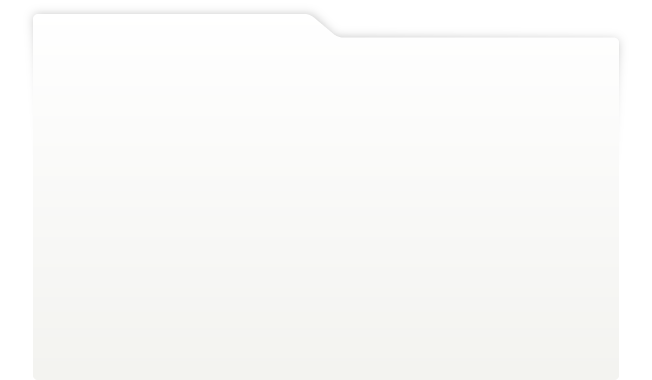
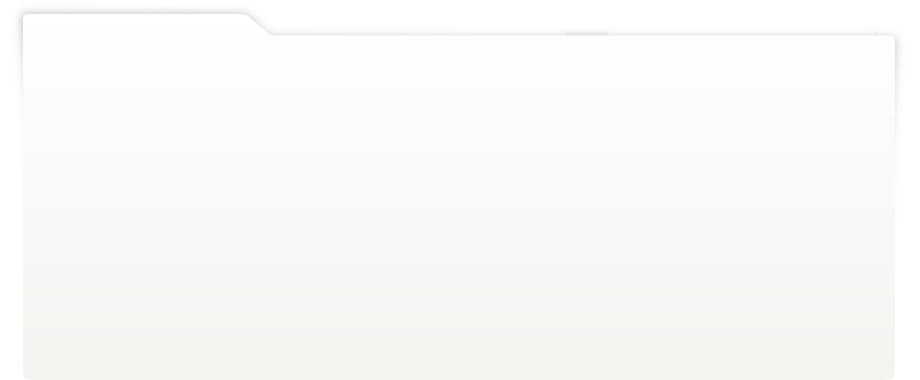
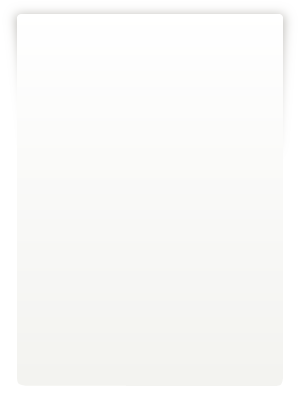
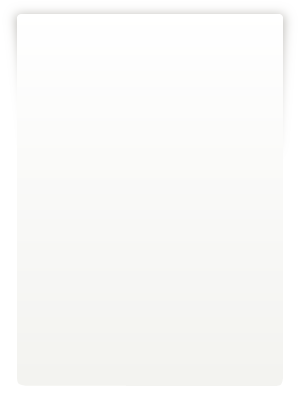
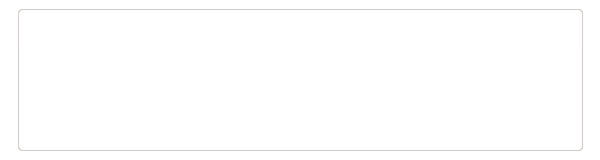
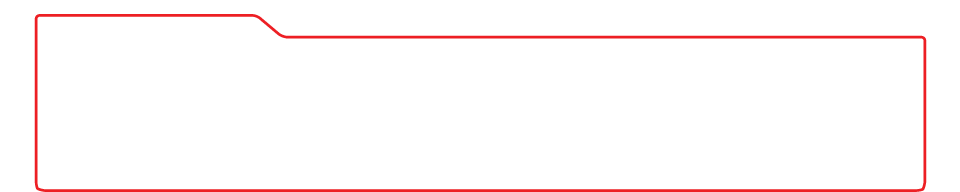
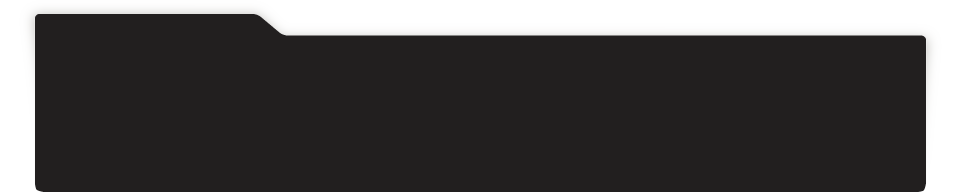
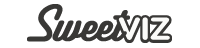
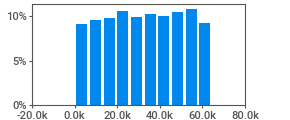
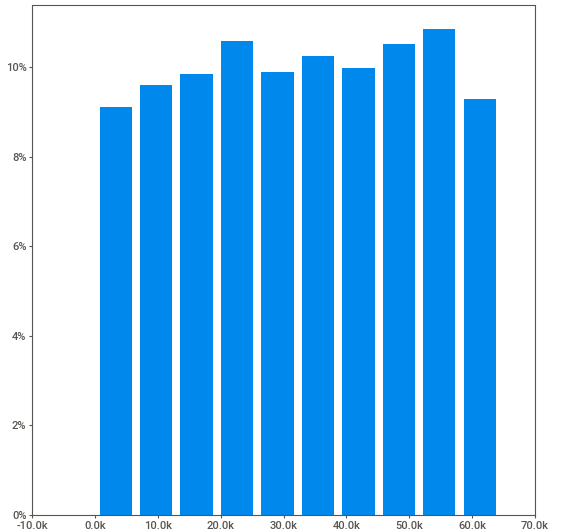
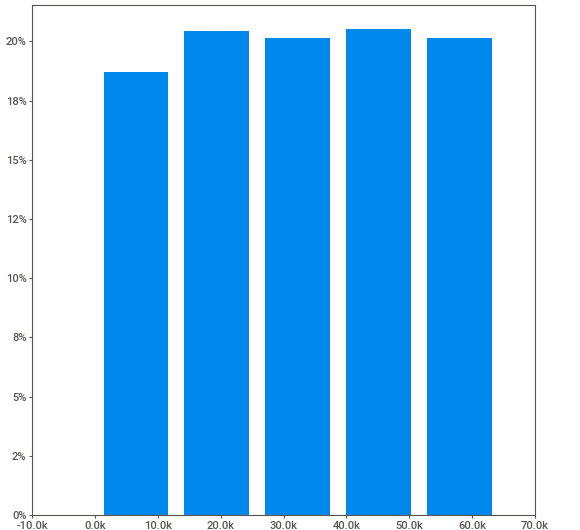
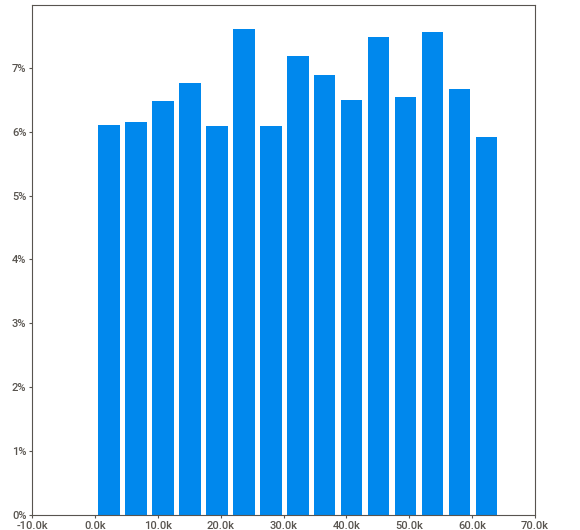
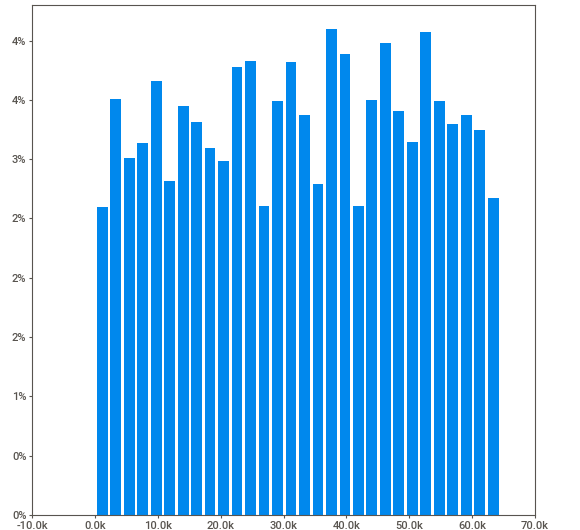
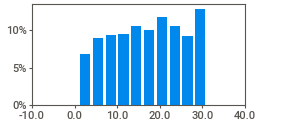
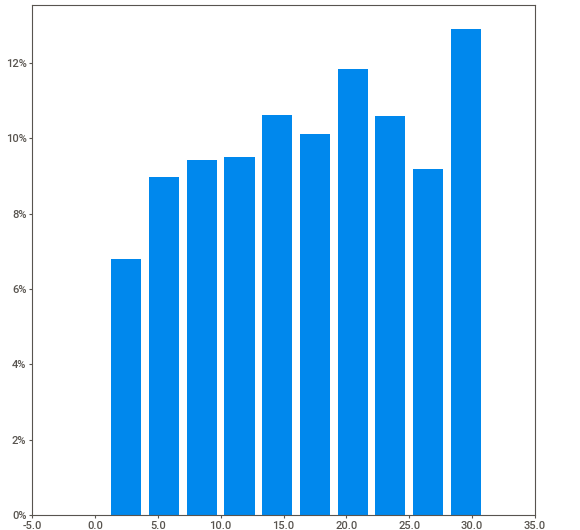
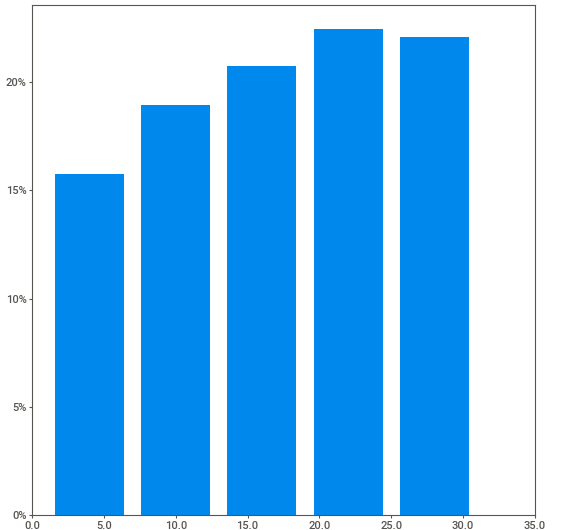
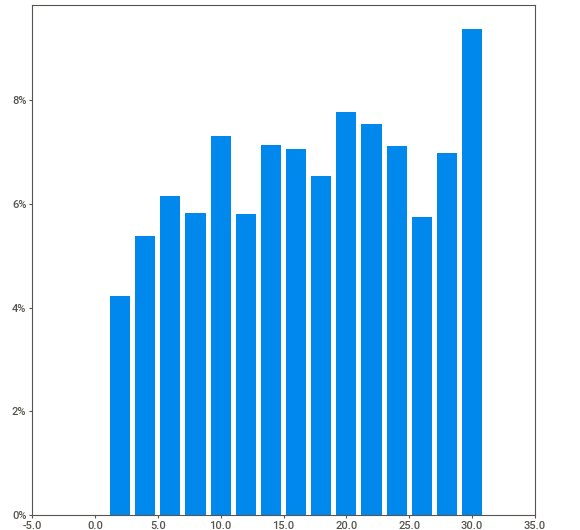
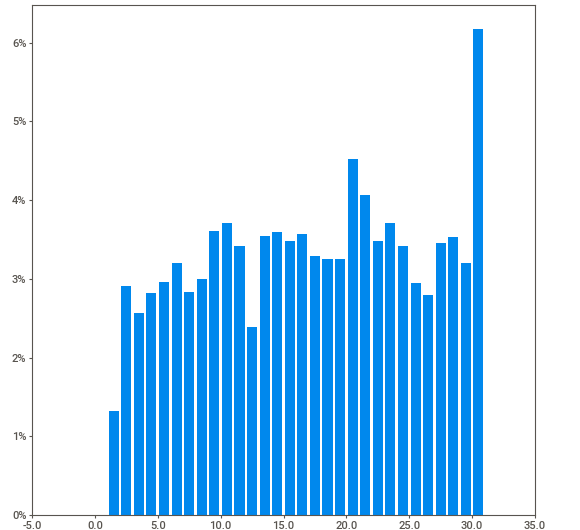
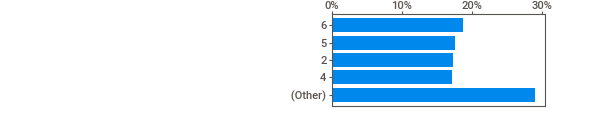
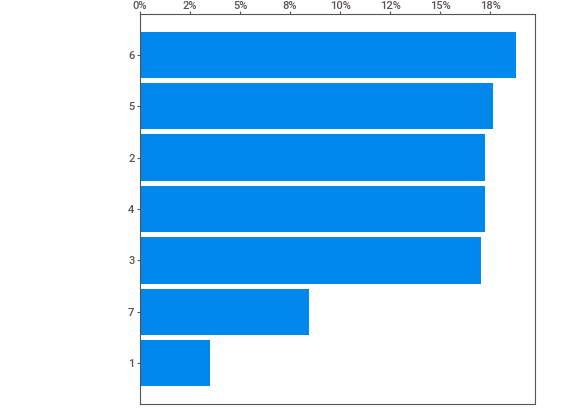
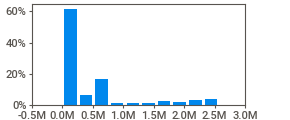
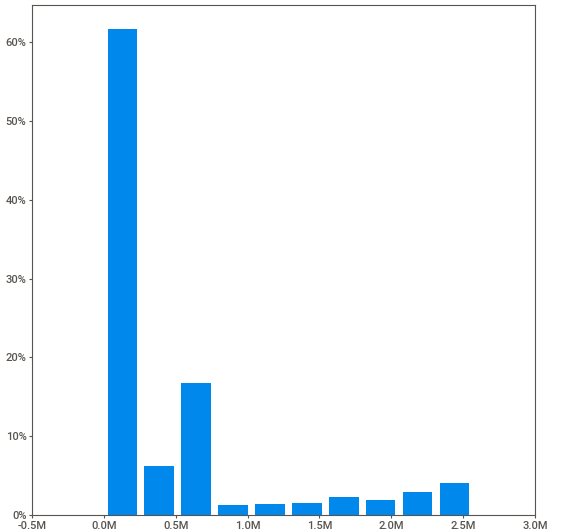
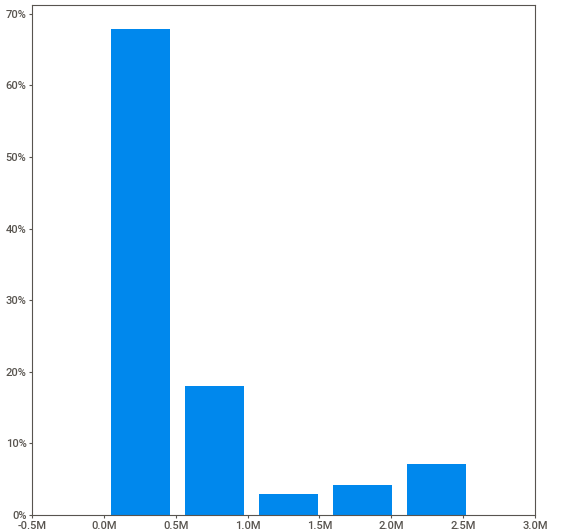
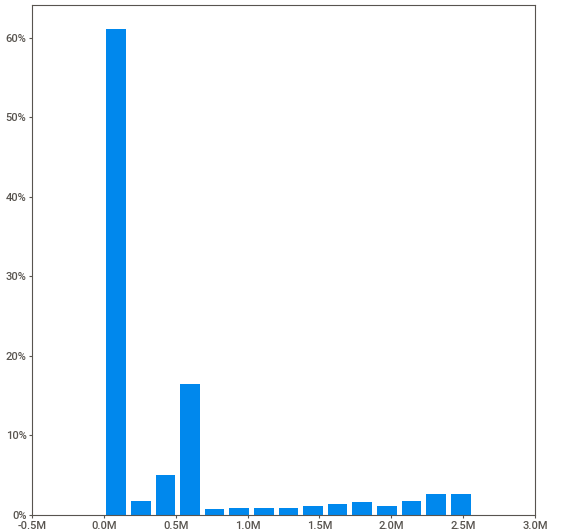
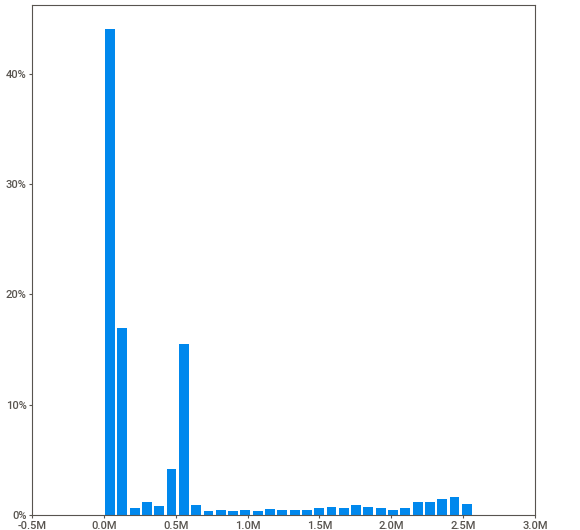
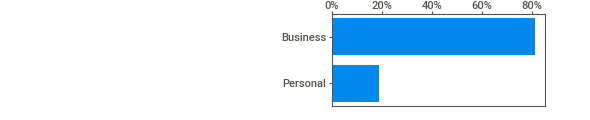
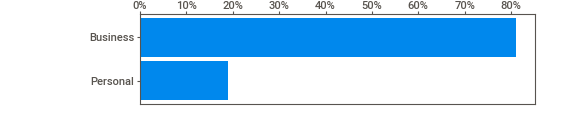
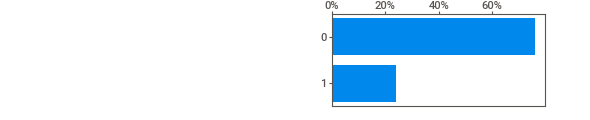
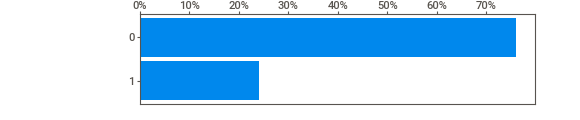
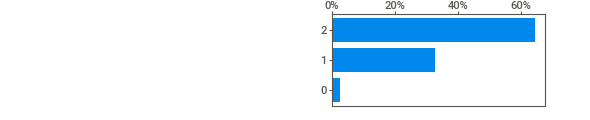
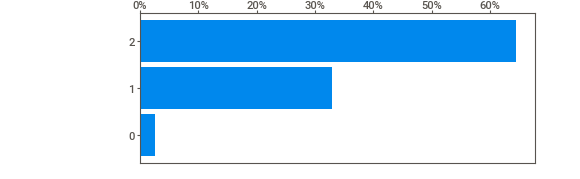
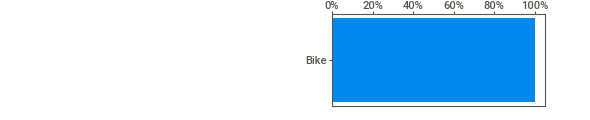
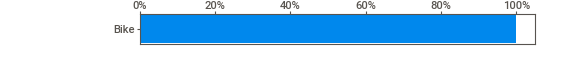
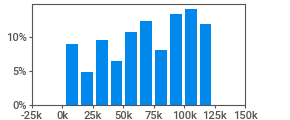
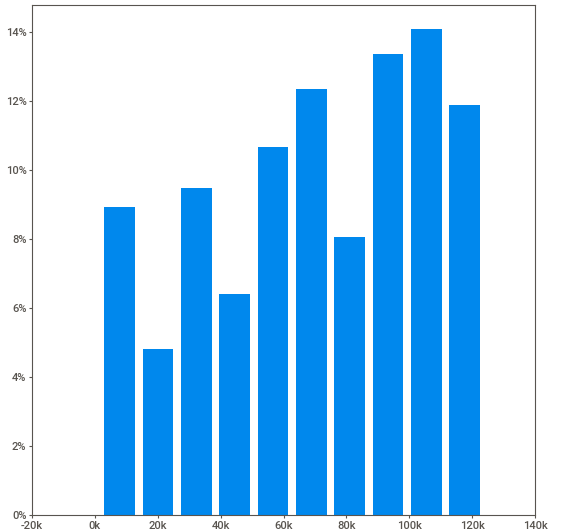
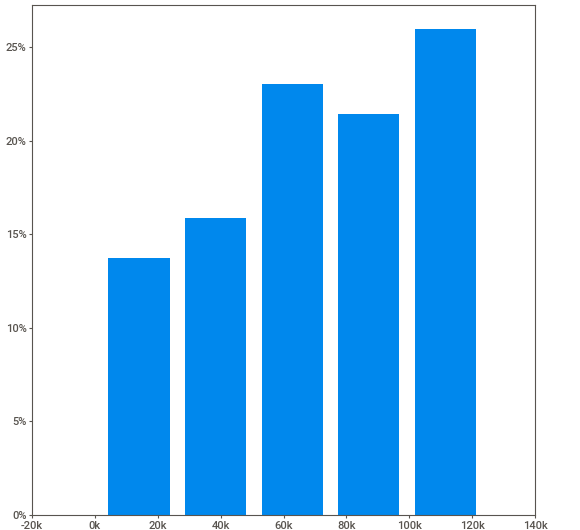
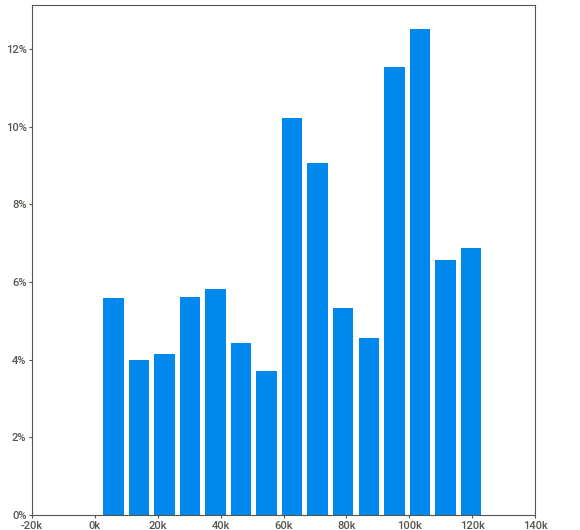
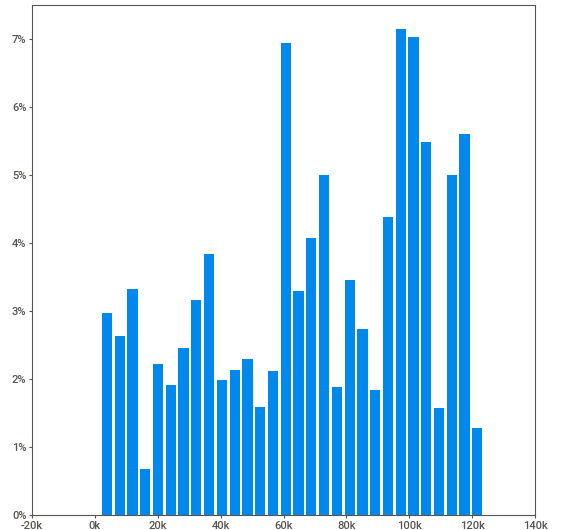
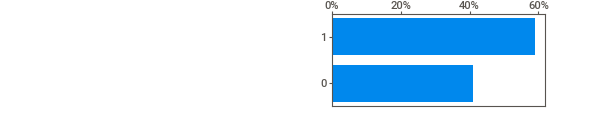
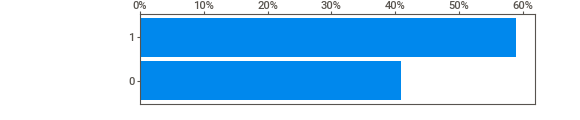
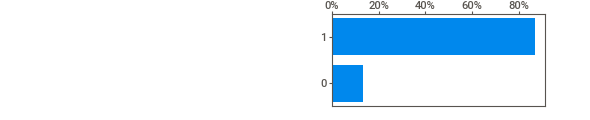
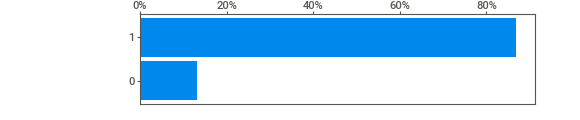
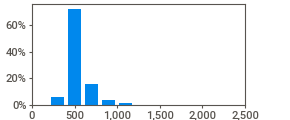
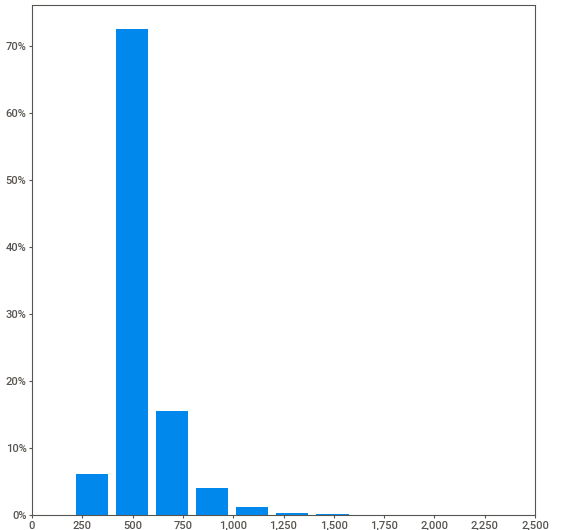
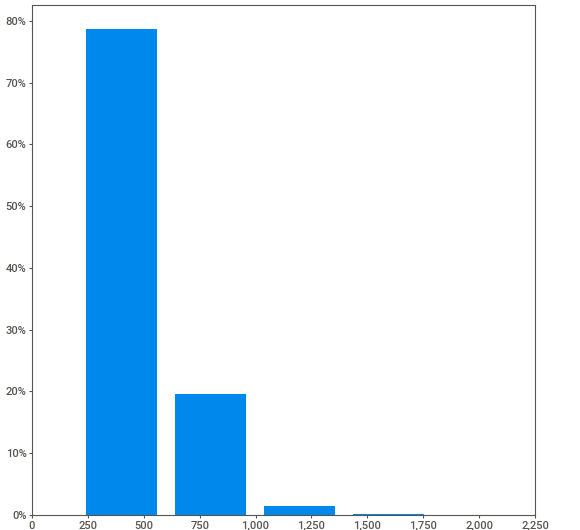
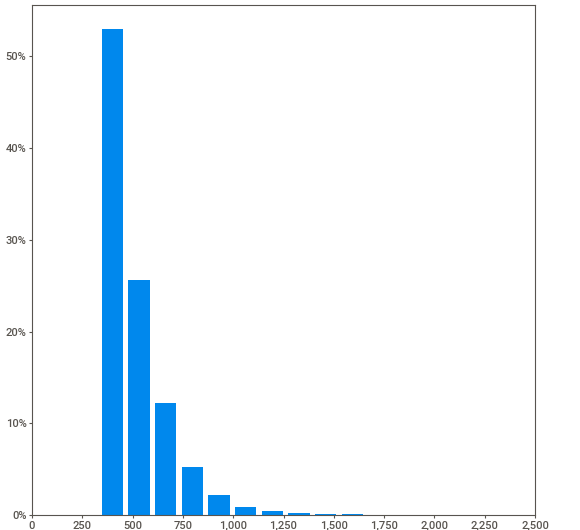
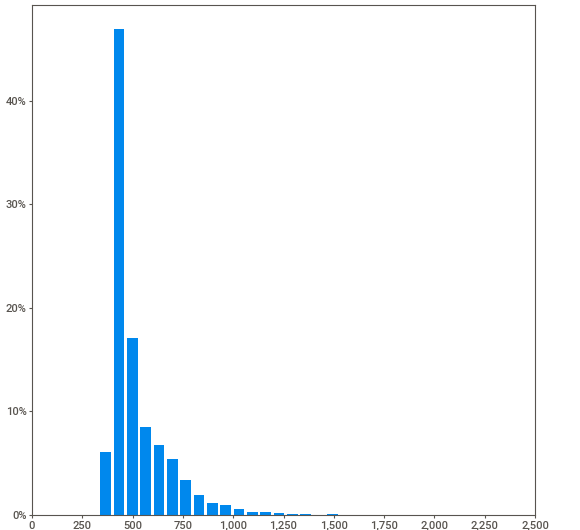
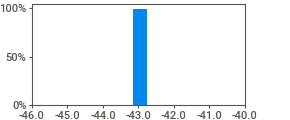
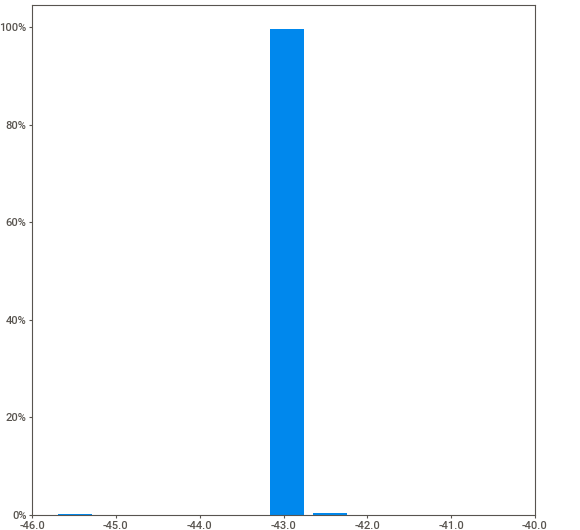
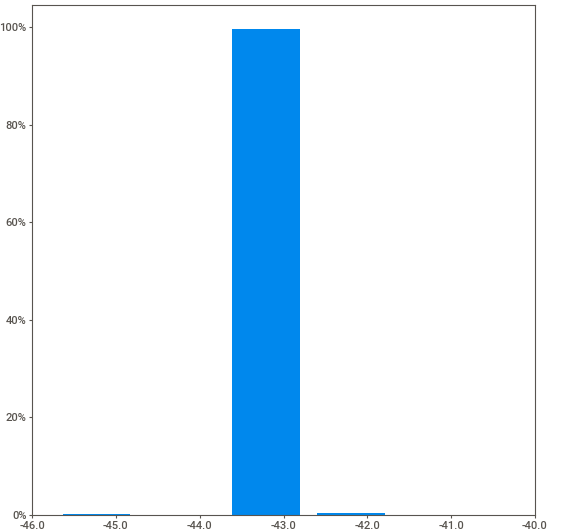
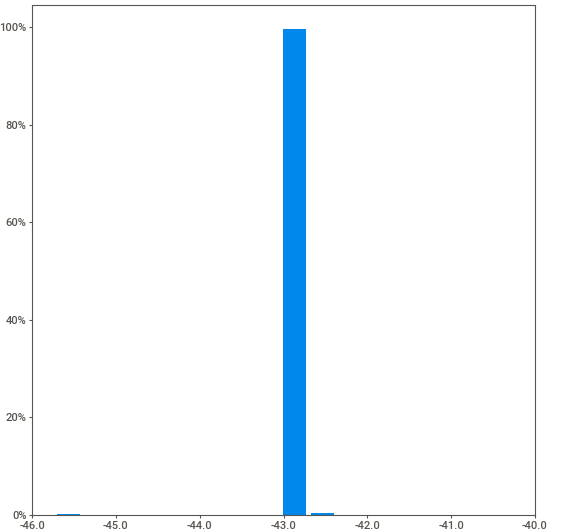
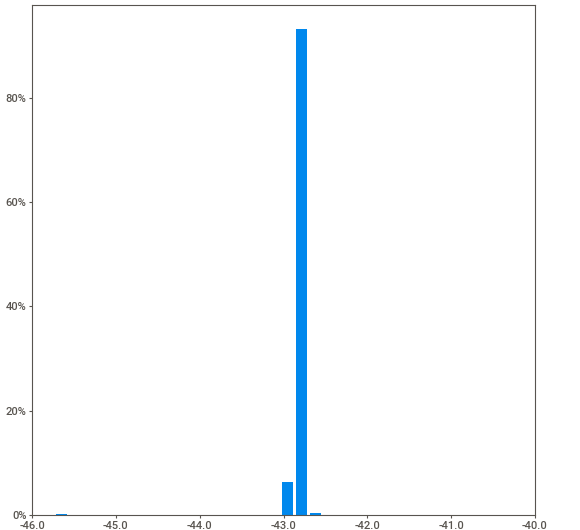
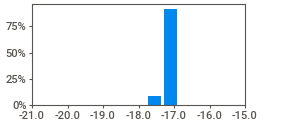
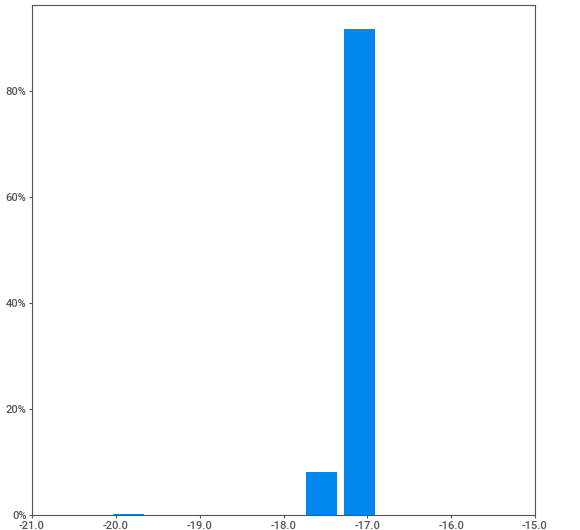
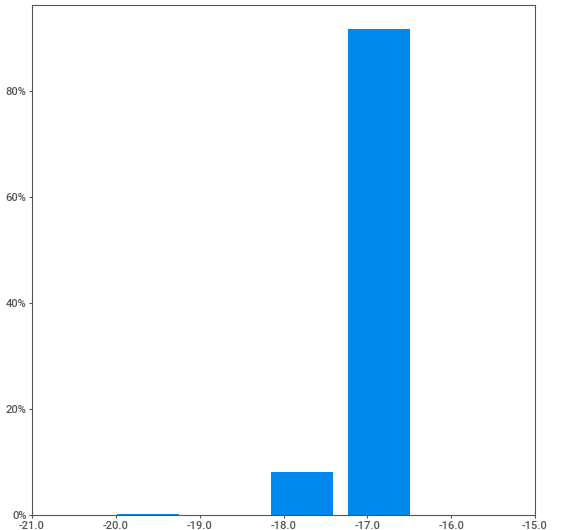
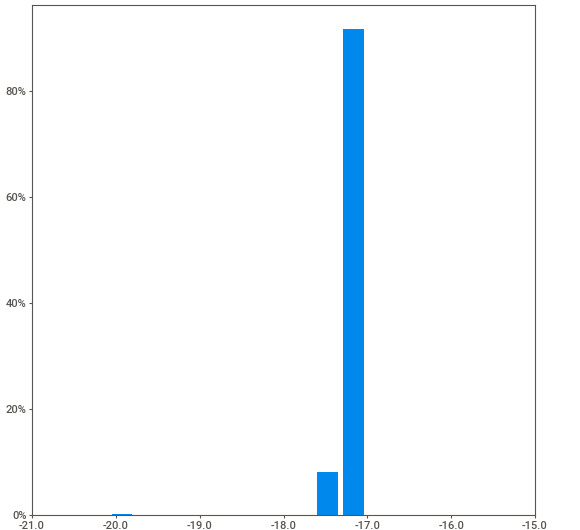
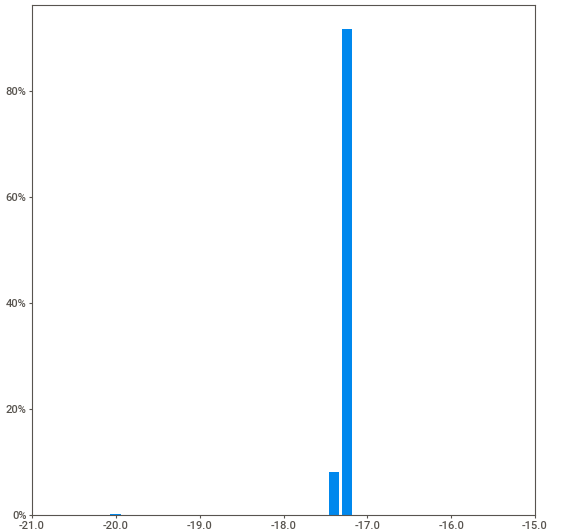
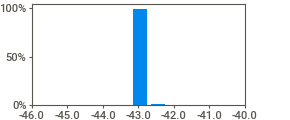
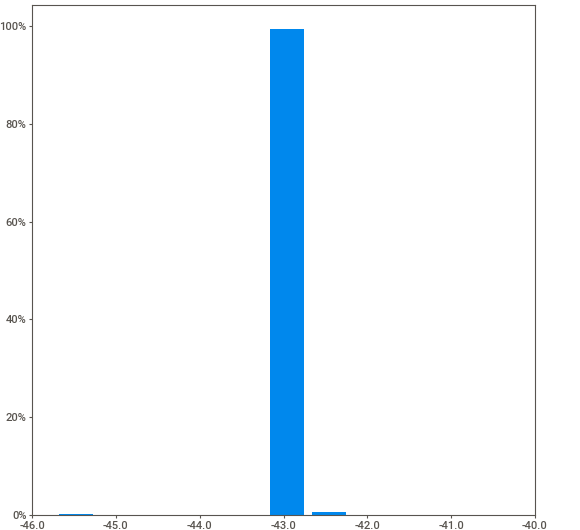
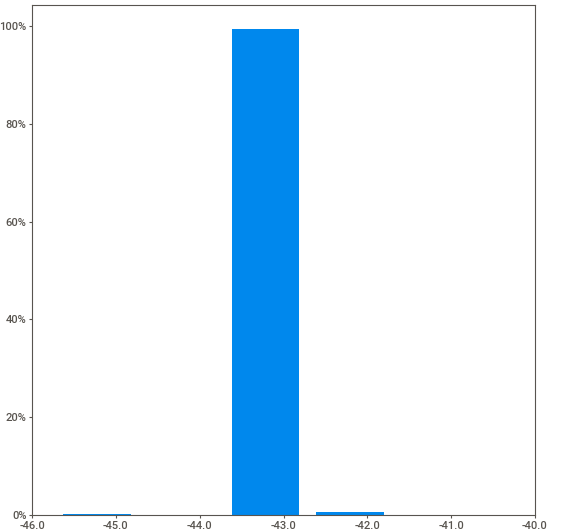
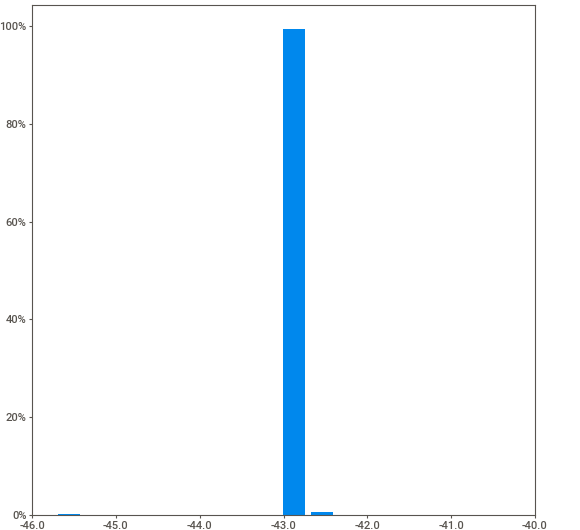
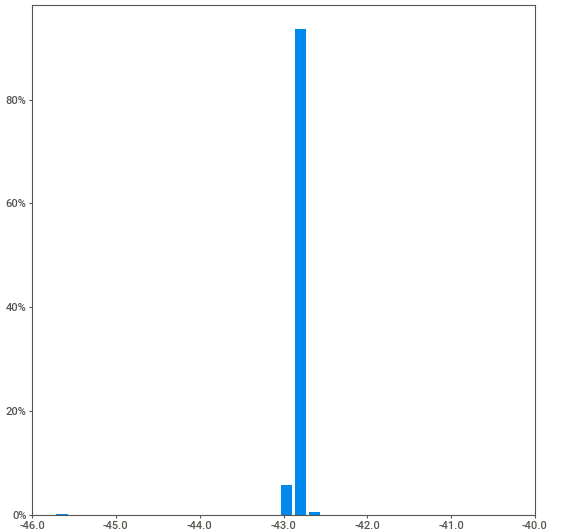
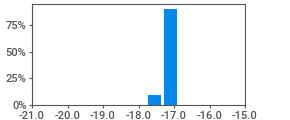
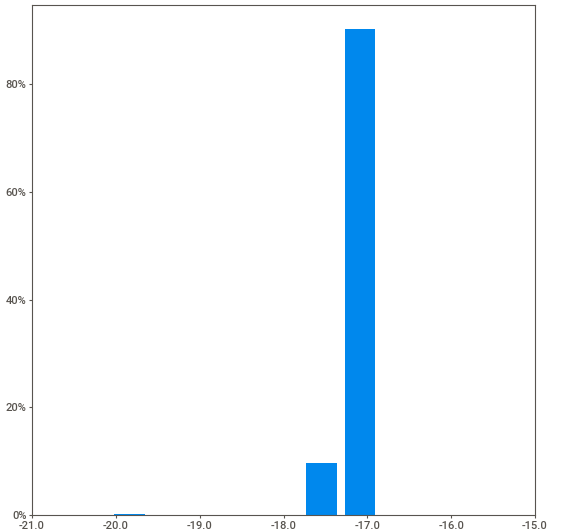
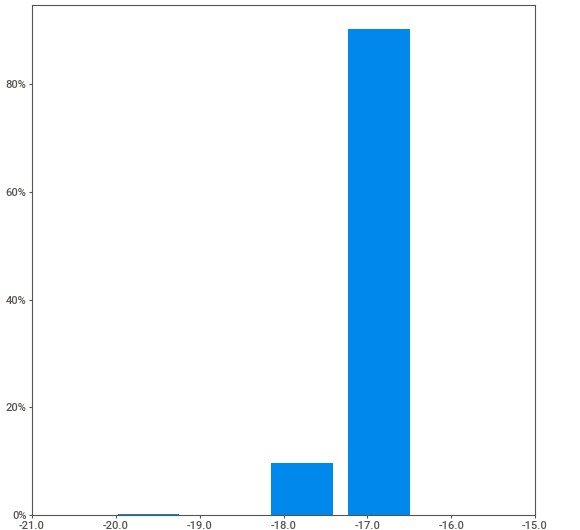
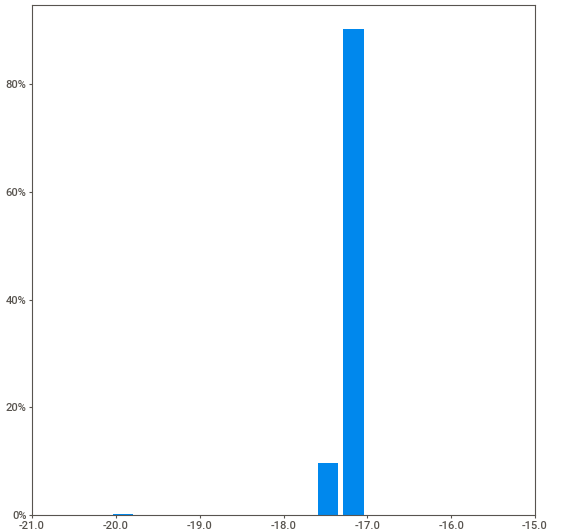
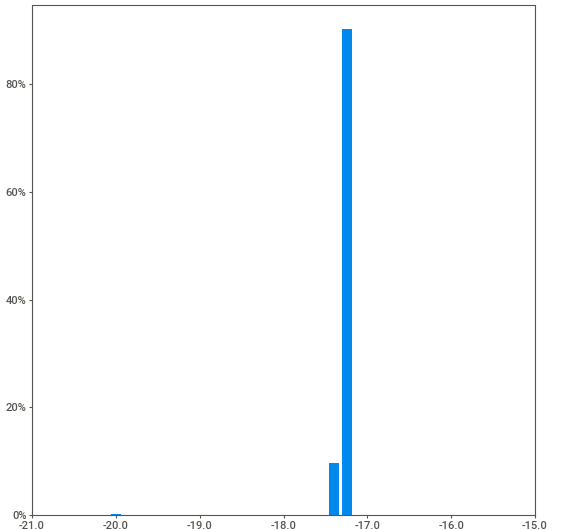
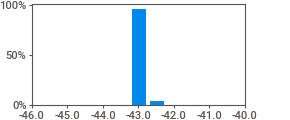
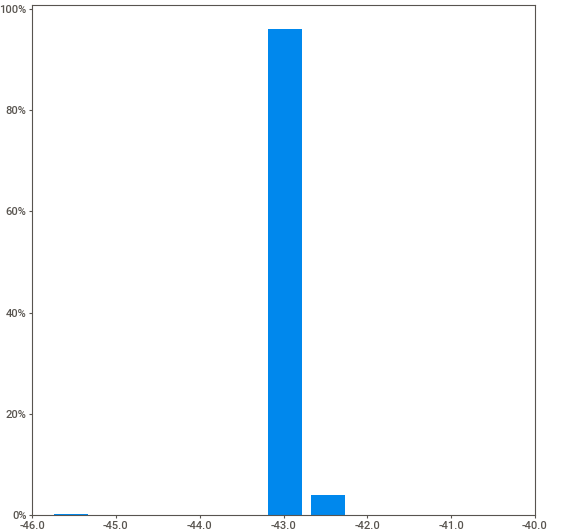
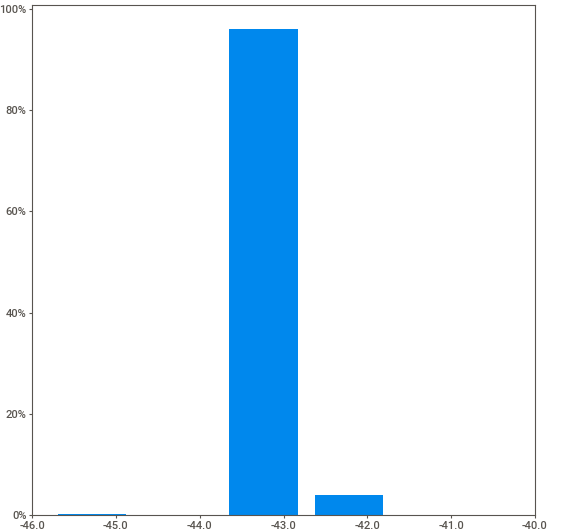
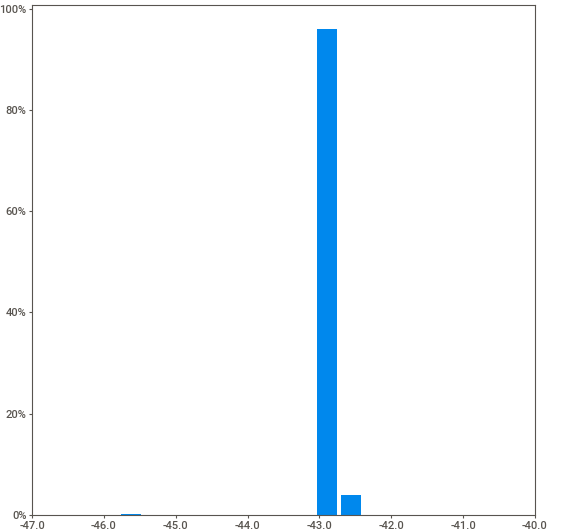
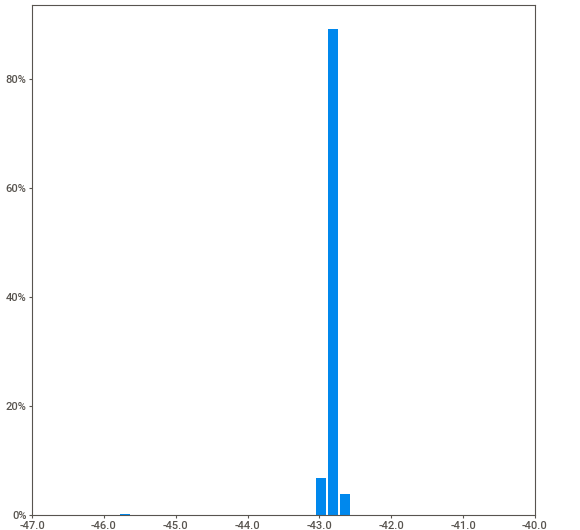
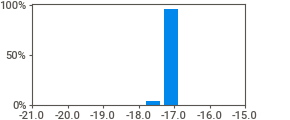
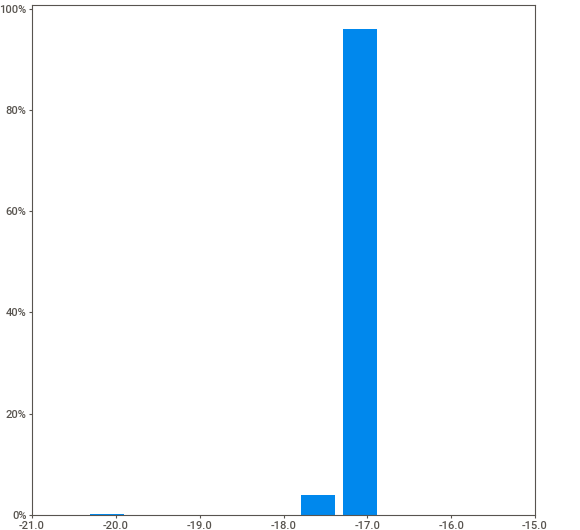
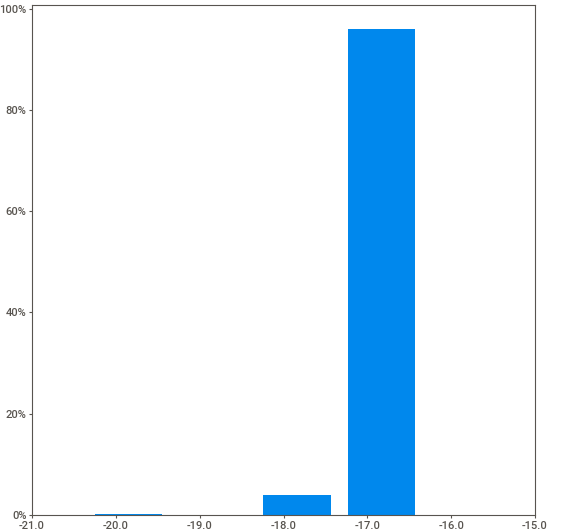
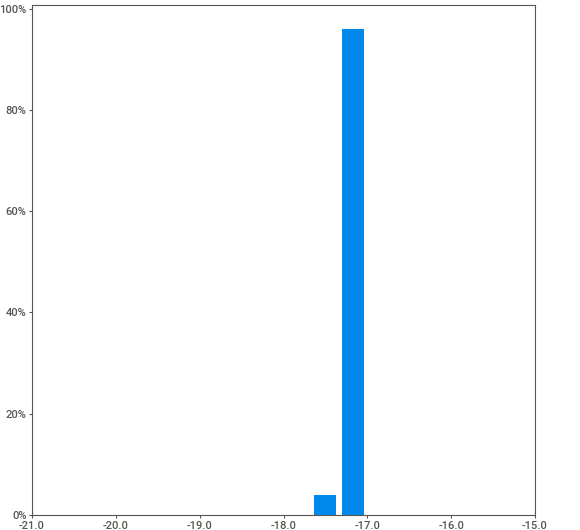
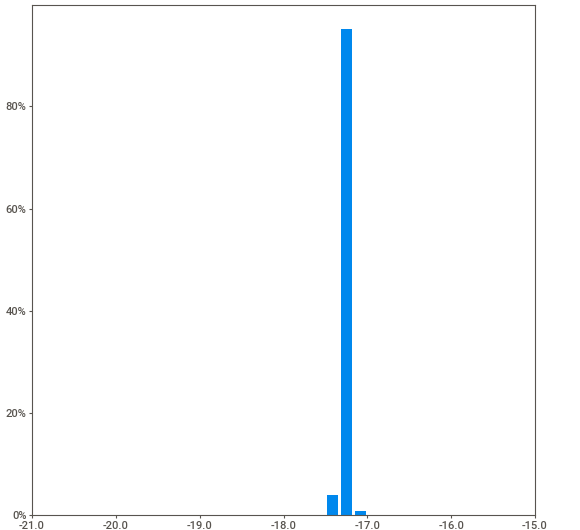
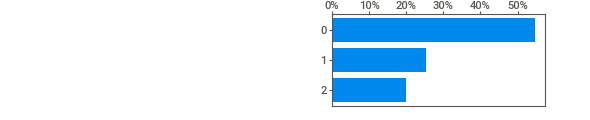
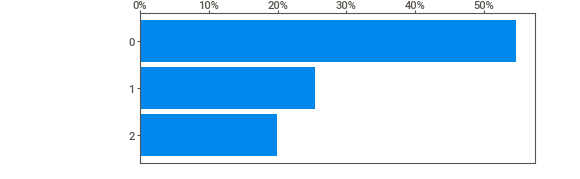
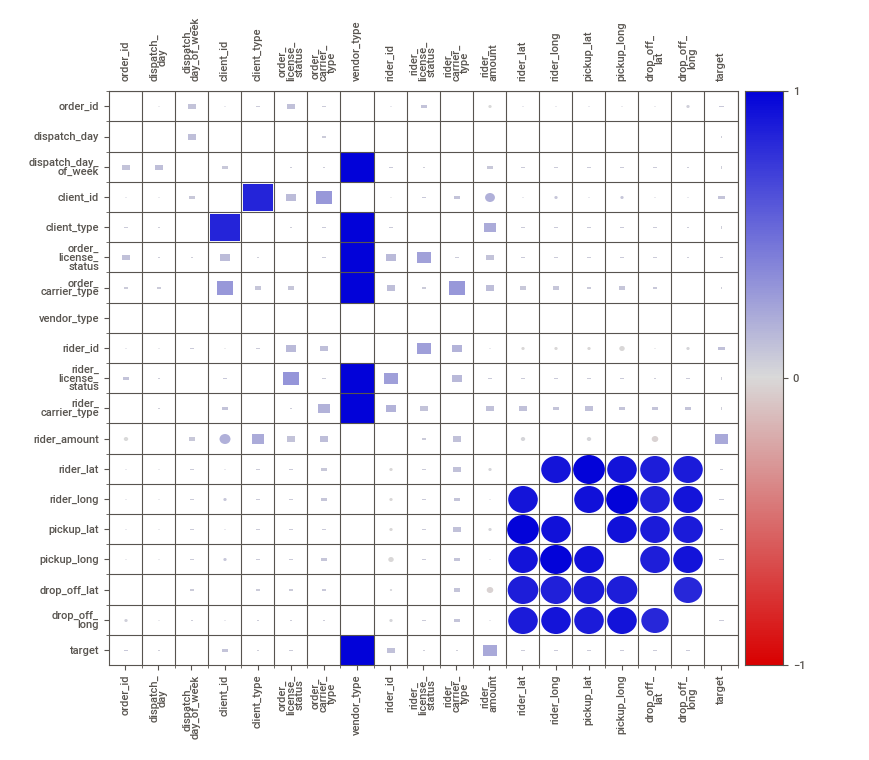
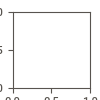

In [12]:
# %perform EDA analysis
train_report = sv.analyze(train)
train_report.show_notebook()

                                             |                                             | [  0%]   00:00 ->…


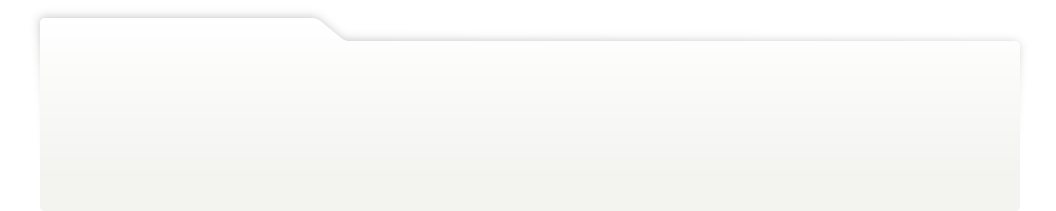
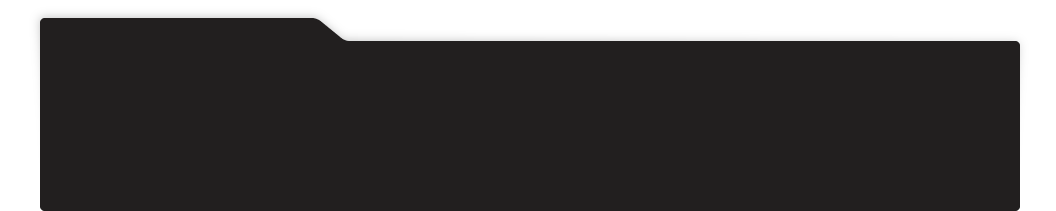
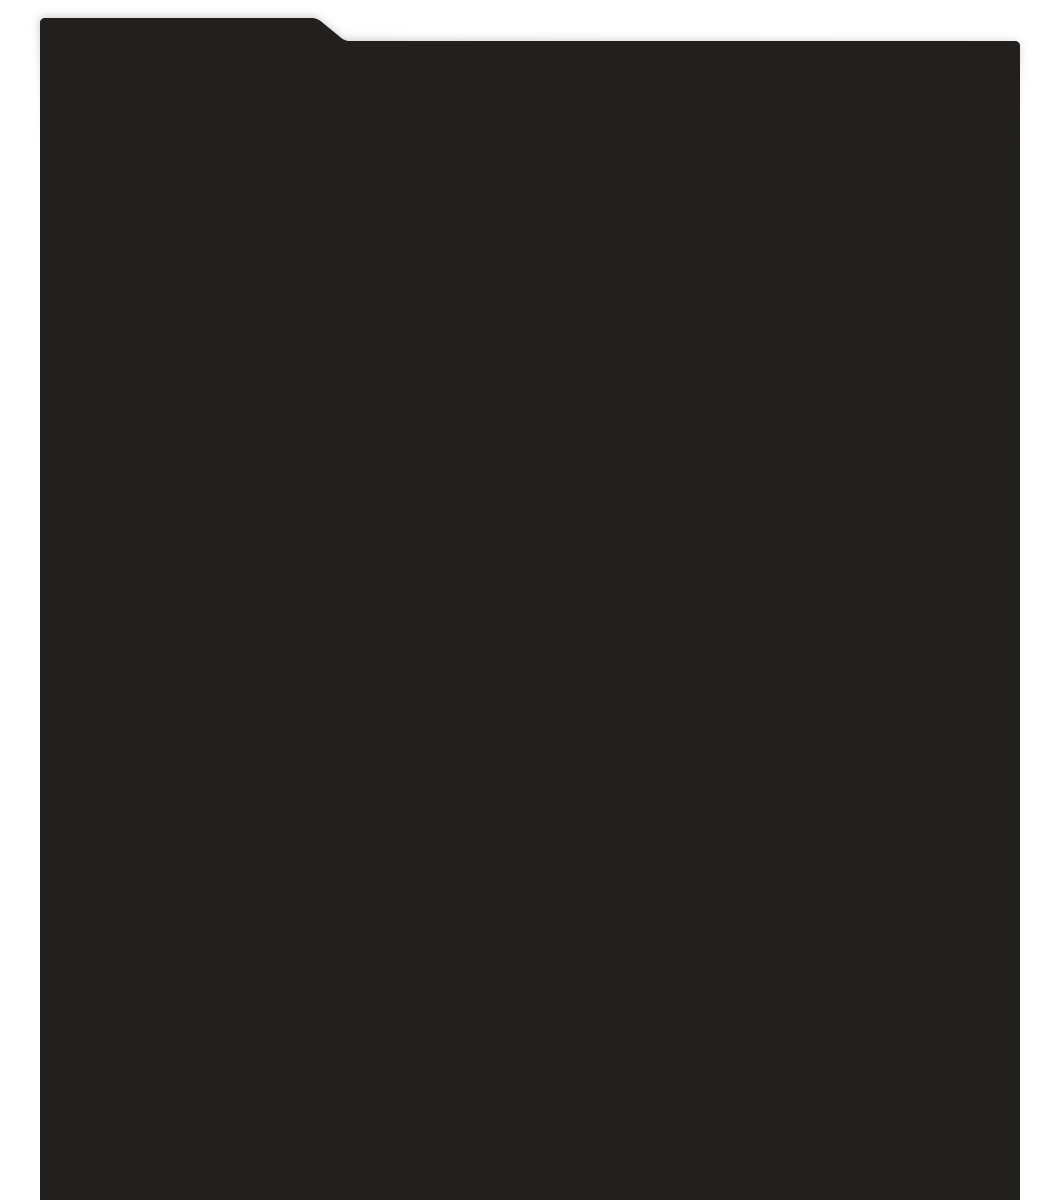
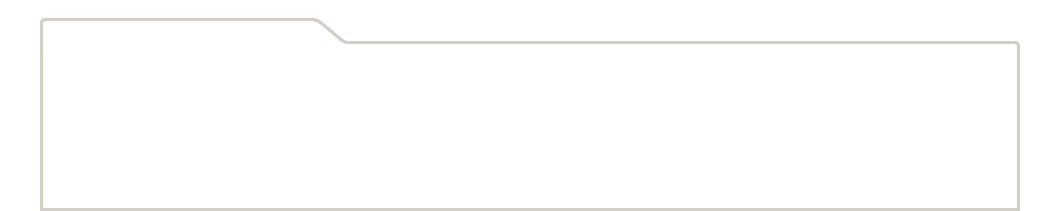
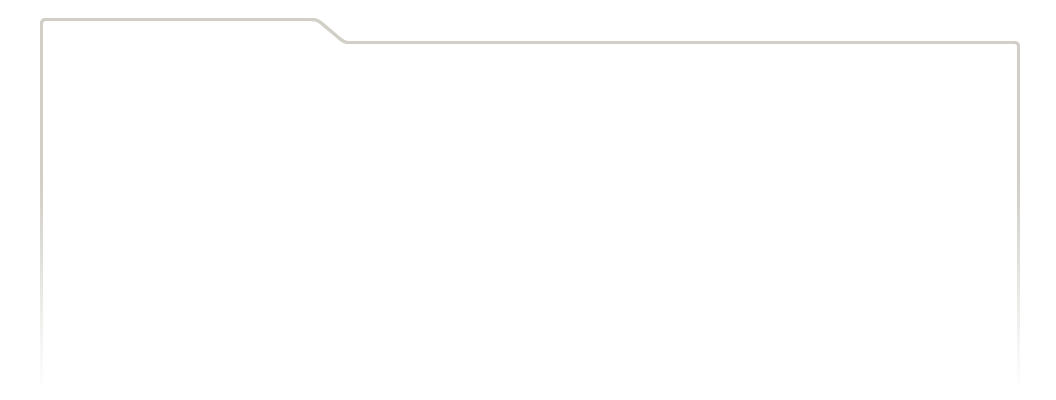
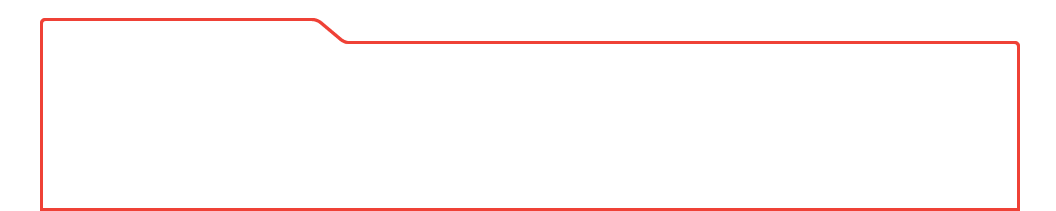
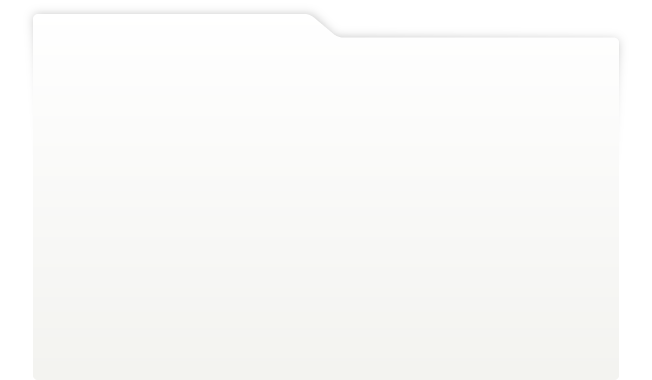
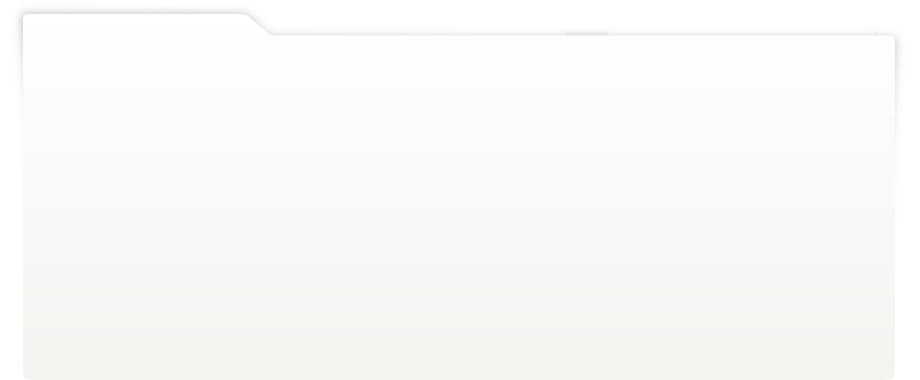
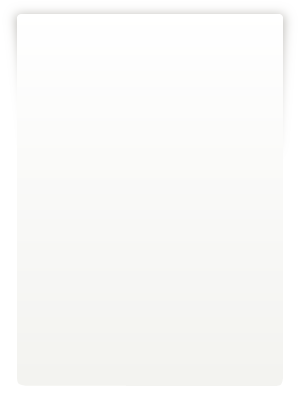
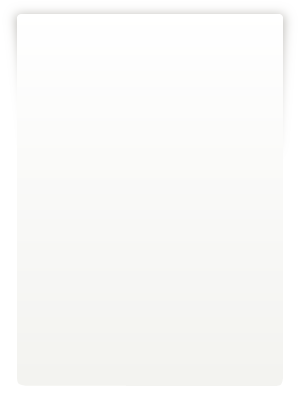
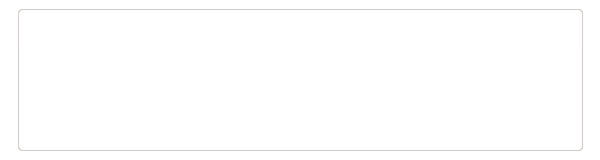
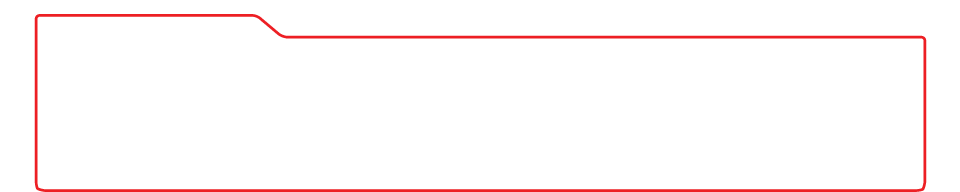
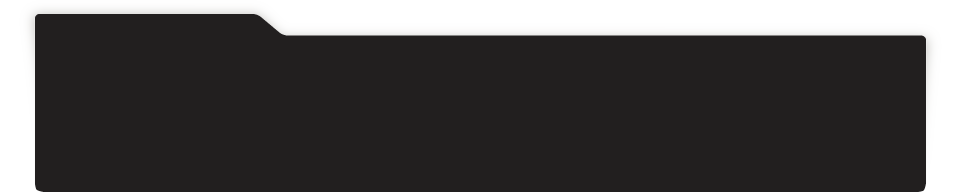
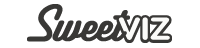
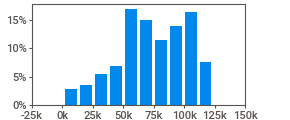
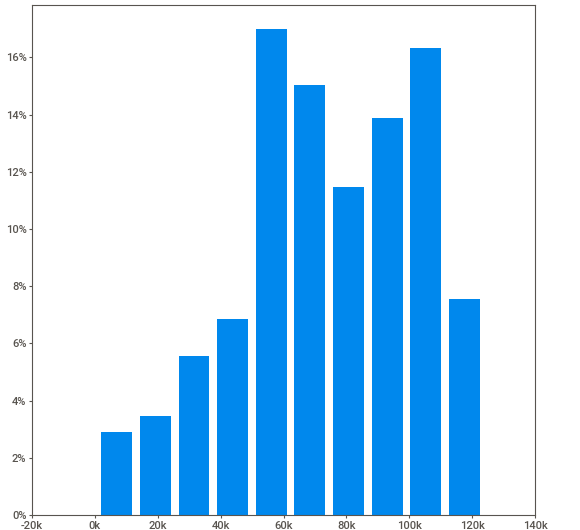
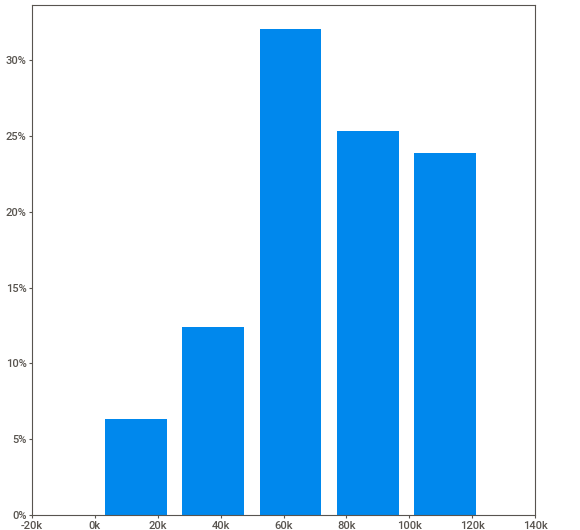
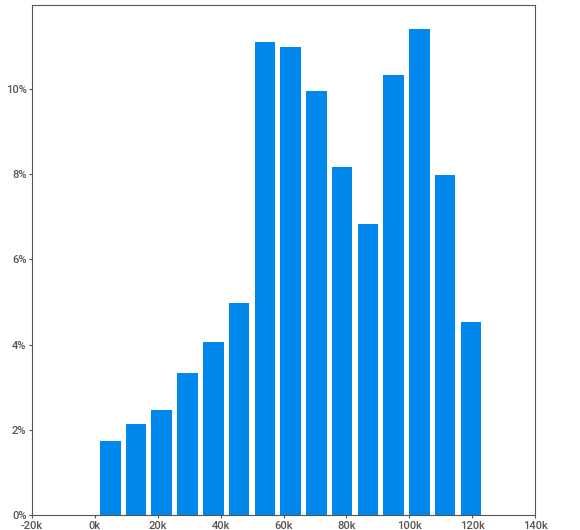
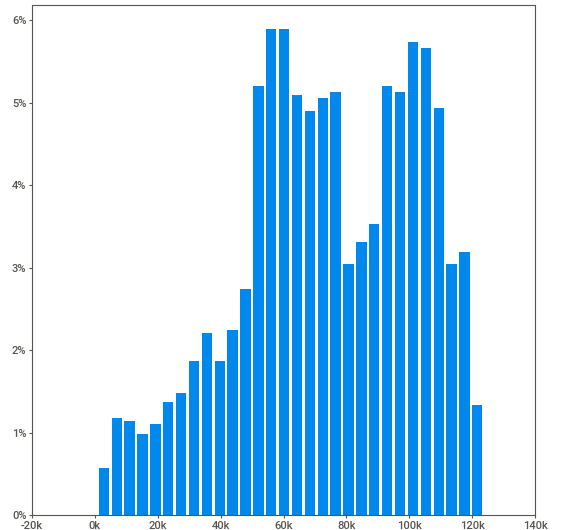
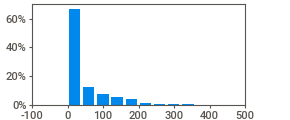
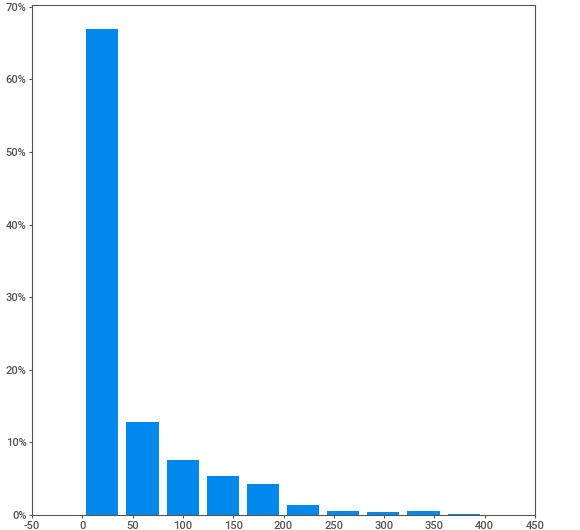
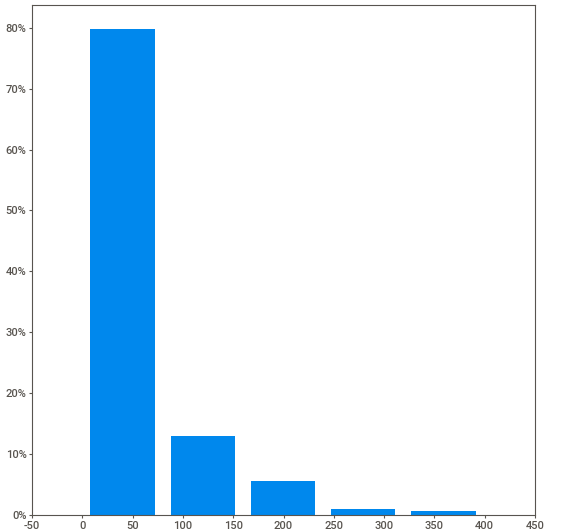
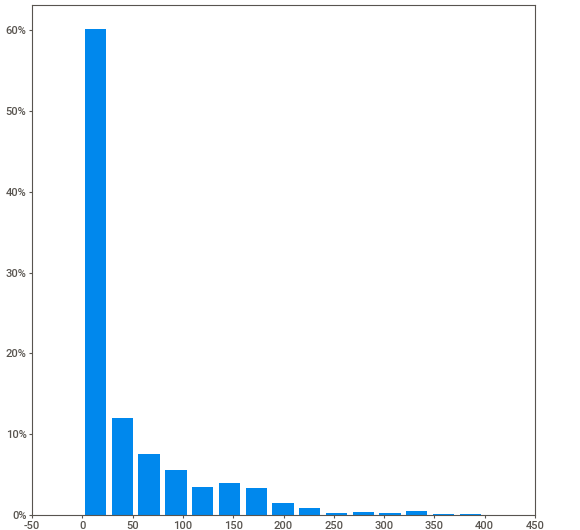
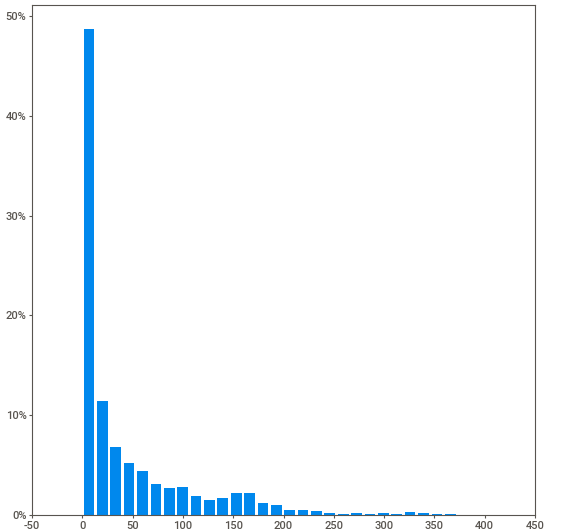
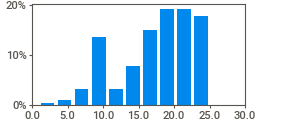
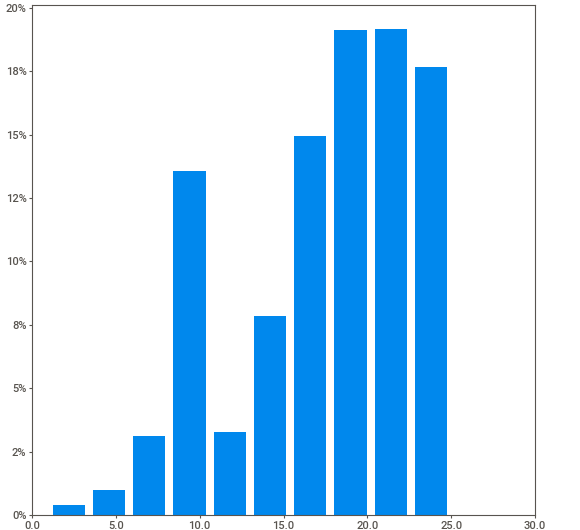
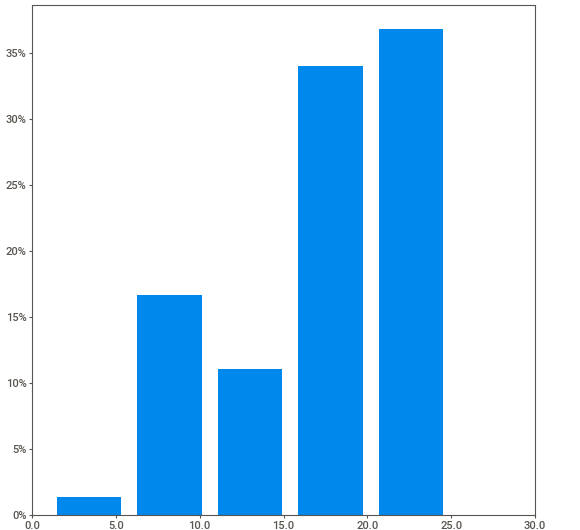
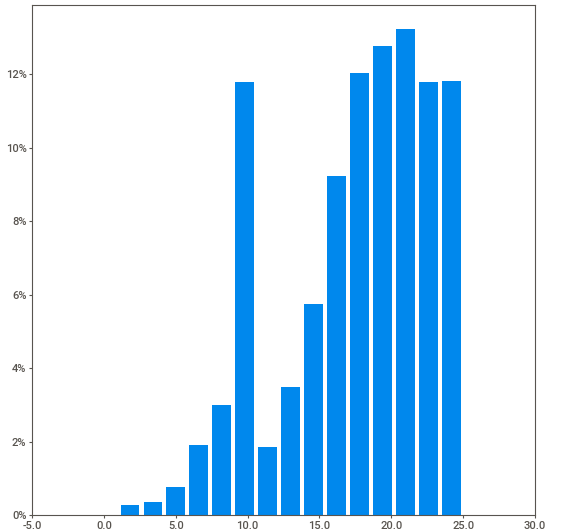
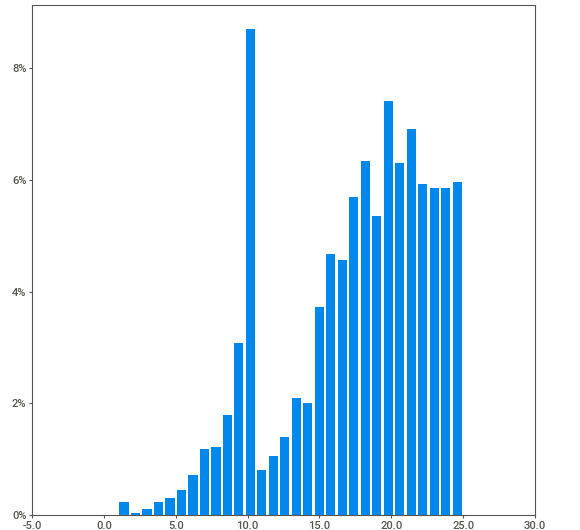
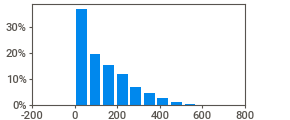
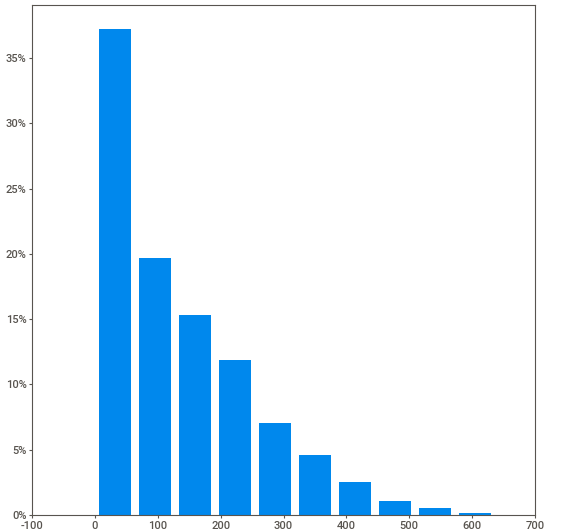
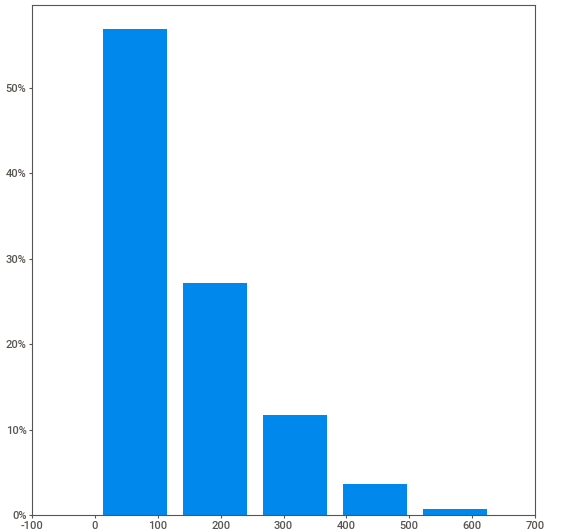
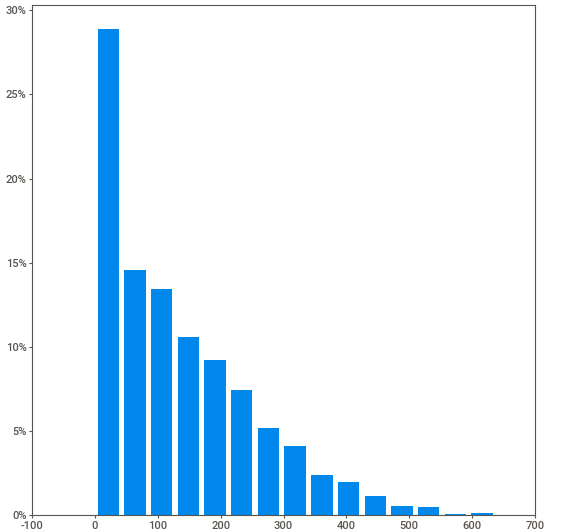
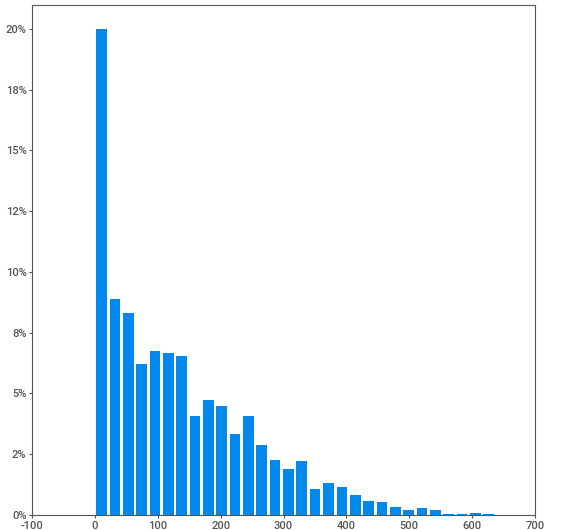
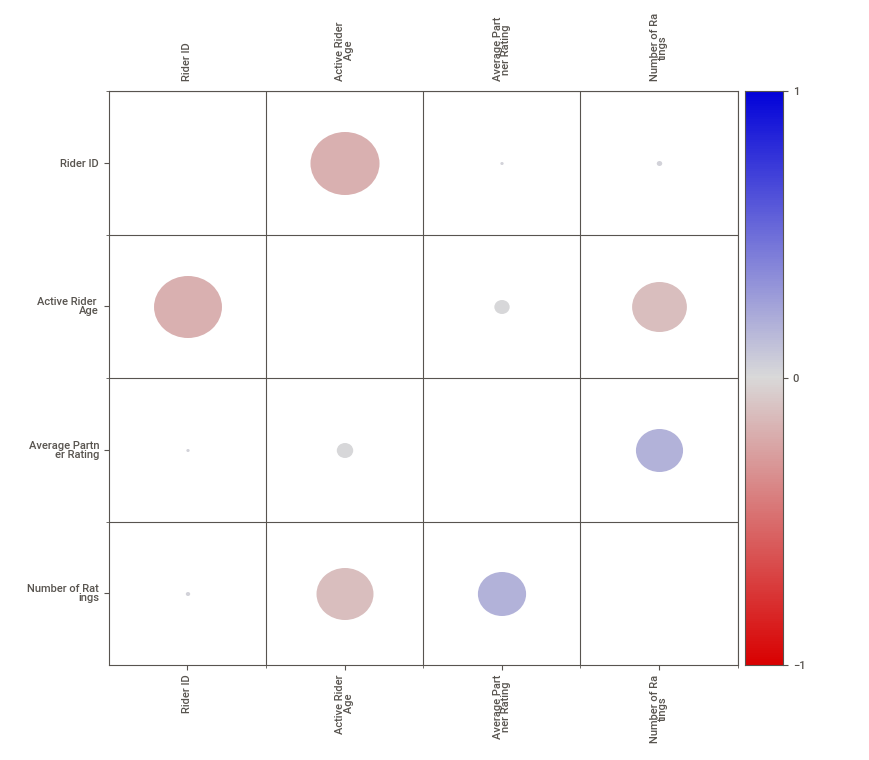
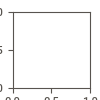

In [13]:
# %perform EDA analysis
r_report = sv.analyze(riders)
r_report.show_notebook()

In [14]:
#Combining Datasets
df = train.merge(riders, how = 'left',left_on='rider_id', right_on='Rider ID' )
df.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,...,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,30153,11,10.00,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,...,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2,20884,68,24.13,229
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,...,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1,33143,273,24.92,123
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,...,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2,96531,168,23.76,175
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,...,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0,103546,95,24.53,42


In [15]:
df.tail()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
179862,ID_ZSG11STPCJ,15779,9,4,10:12:52,2029175,Personal,0,2,Bike,...,-17.263385,-42.797847,-17.257129,-42.821718,-17.302860,2,117093,25,10.24,20
179863,ID_25CK50OBPT,4574,15,2,09:08:45,75647,Business,0,1,Bike,...,-17.273777,-42.821400,-17.272752,-42.786174,-17.281706,0,70196,224,10.00,1
179864,ID_MFL3T3X89C,22882,13,7,11:12:55,62560,Personal,1,2,Bike,...,-17.265304,-42.824923,-17.280676,-42.778648,-17.298742,1,93909,157,24.91,116
179865,ID_JVG80JGEI7,56816,13,2,16:10:12,36869,Business,0,2,Bike,...,-17.338171,-42.836143,-17.317200,-42.790718,-17.258187,0,66033,124,10.00,4
179866,ID_F2VWU0TAVK,4425,13,6,09:02:38,62583,Business,0,0,Bike,...,-17.262736,-42.818745,-17.264852,-42.883180,-17.240410,2,33143,273,24.92,123


In [19]:
df.isnull().sum().any()

False

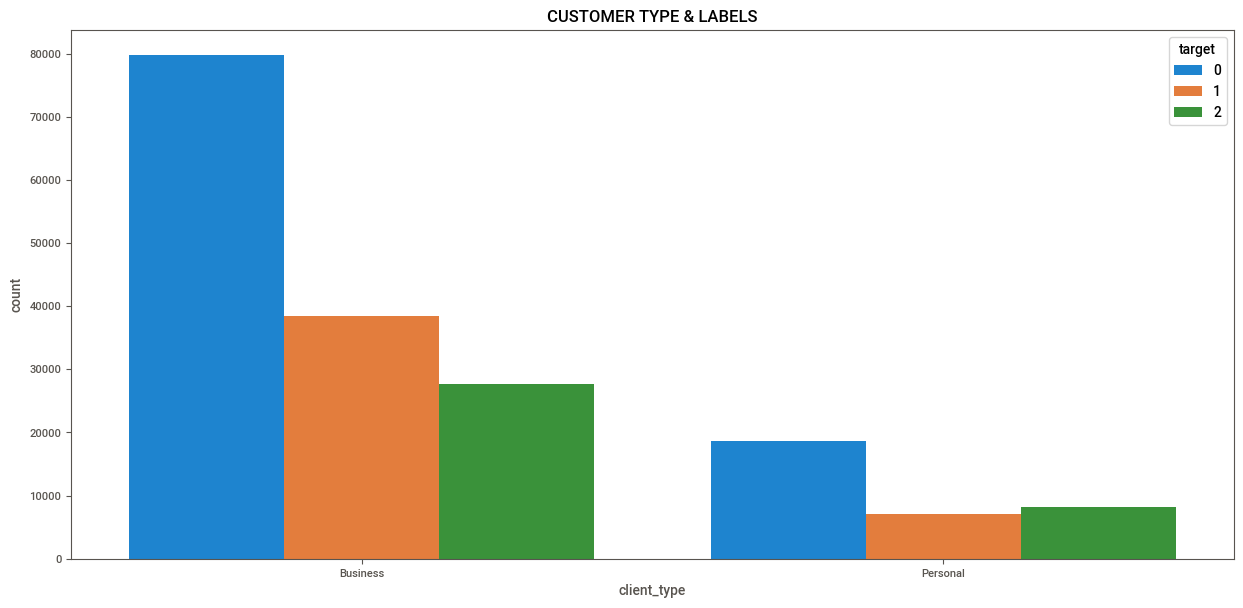

In [20]:
#Bivariate and Multivariate Analysis
# Let's visualize the distribution between type of customers and the labels

#Categorical Variables
plt.figure(figsize=(15,7))
sns.countplot(x = 'client_type', hue = 'target', data = df)
plt.title('CUSTOMER TYPE & LABELS')
plt.show()

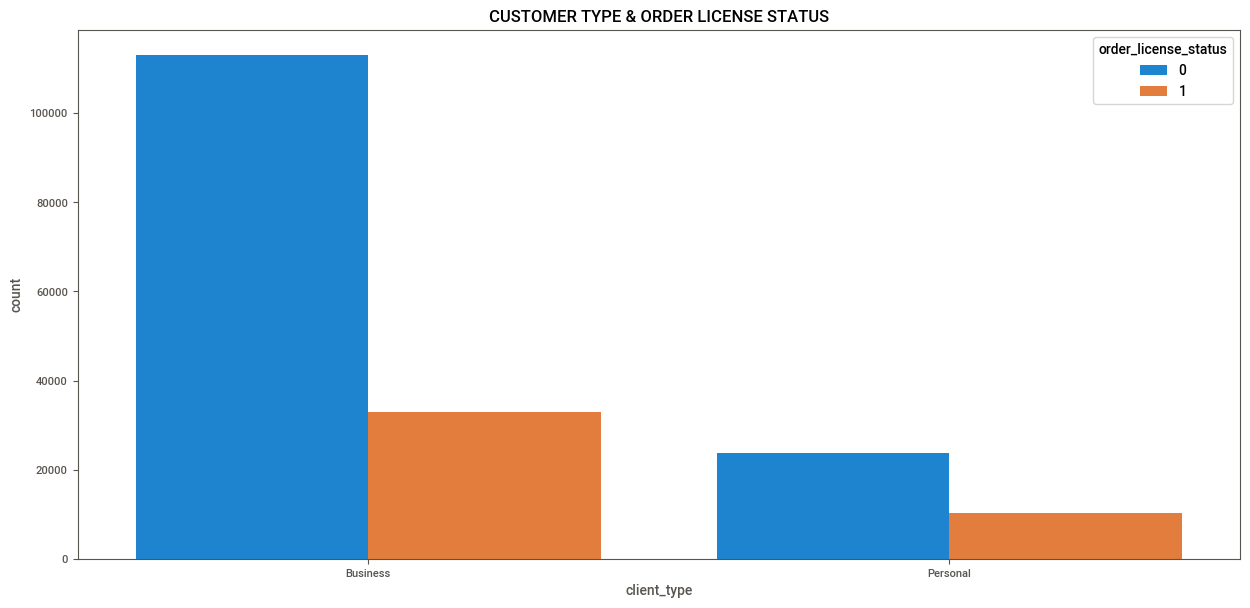

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'client_type', hue = 'order_license_status', data = df)
plt.title('CUSTOMER TYPE & ORDER LICENSE STATUS')
plt.show()

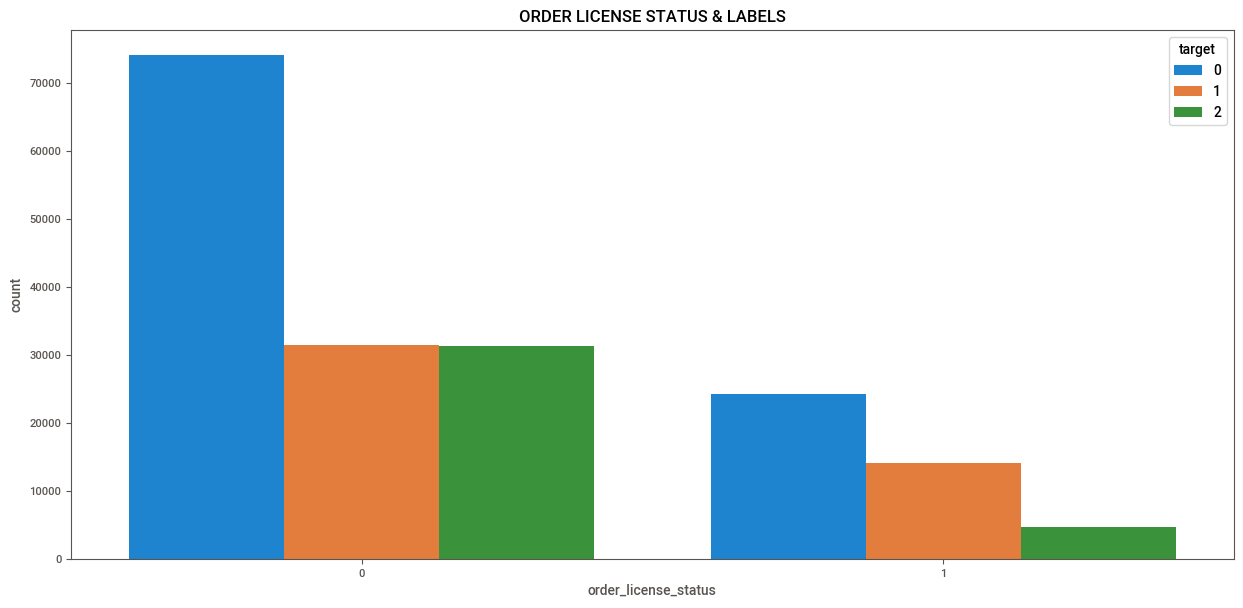

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'order_license_status', hue = 'target', data = df)
plt.title('ORDER LICENSE STATUS & LABELS')
plt.show()

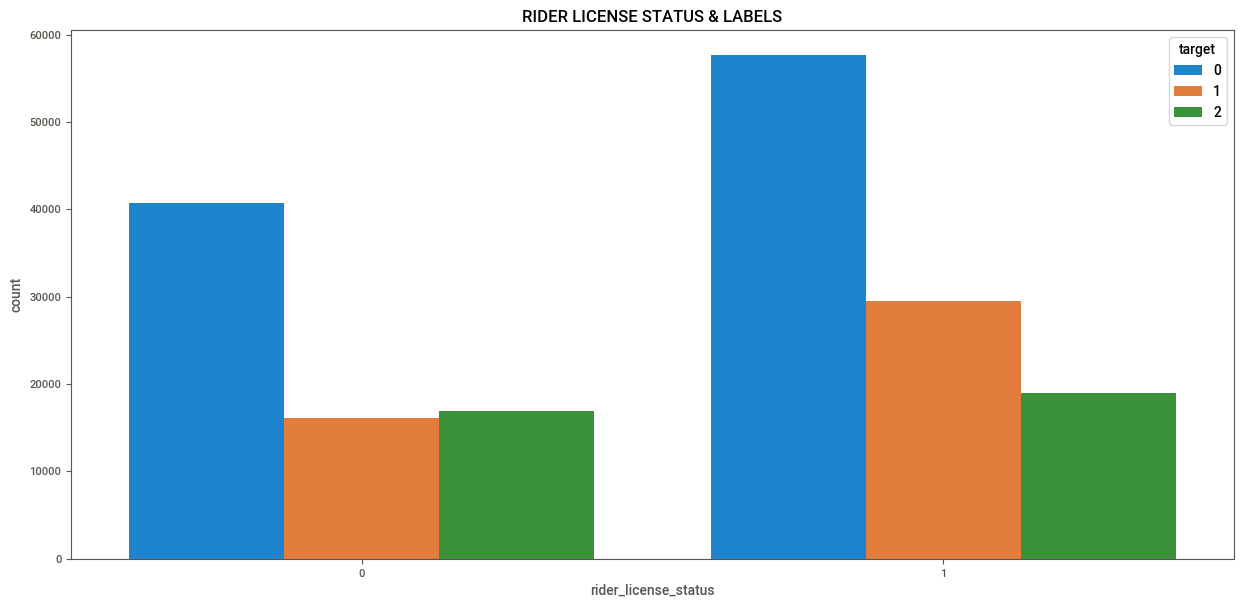

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'rider_license_status', hue = 'target', data = df)
plt.title('RIDER LICENSE STATUS & LABELS')
plt.show()

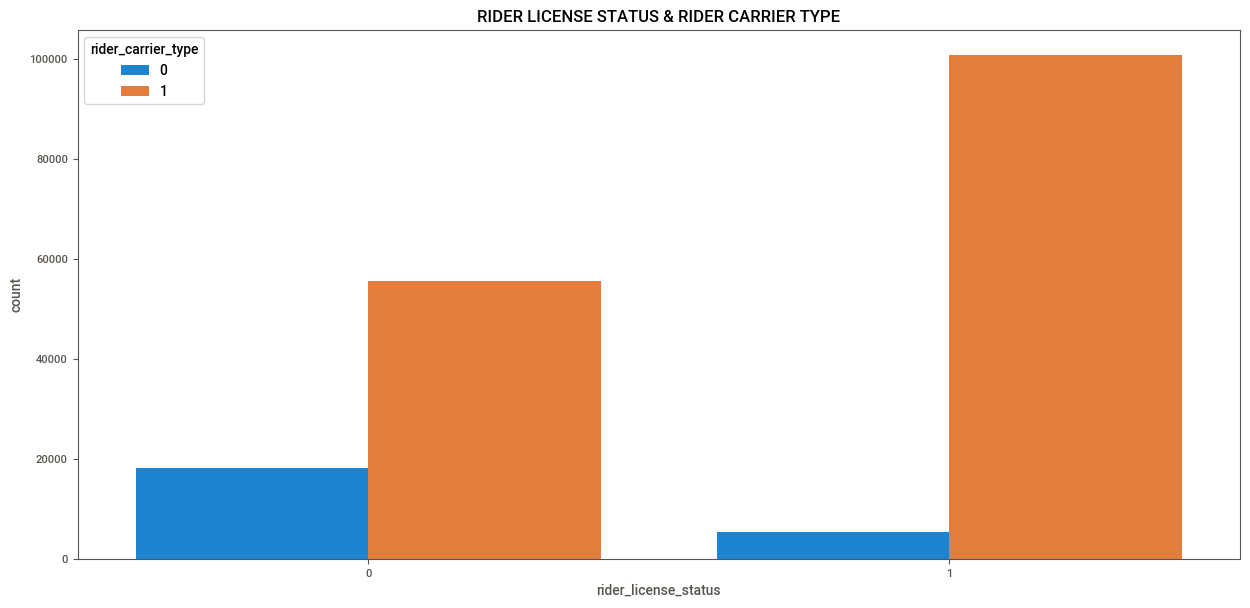

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'rider_license_status', hue = 'rider_carrier_type', data = df)
plt.title('RIDER LICENSE STATUS & RIDER CARRIER TYPE')
plt.show()

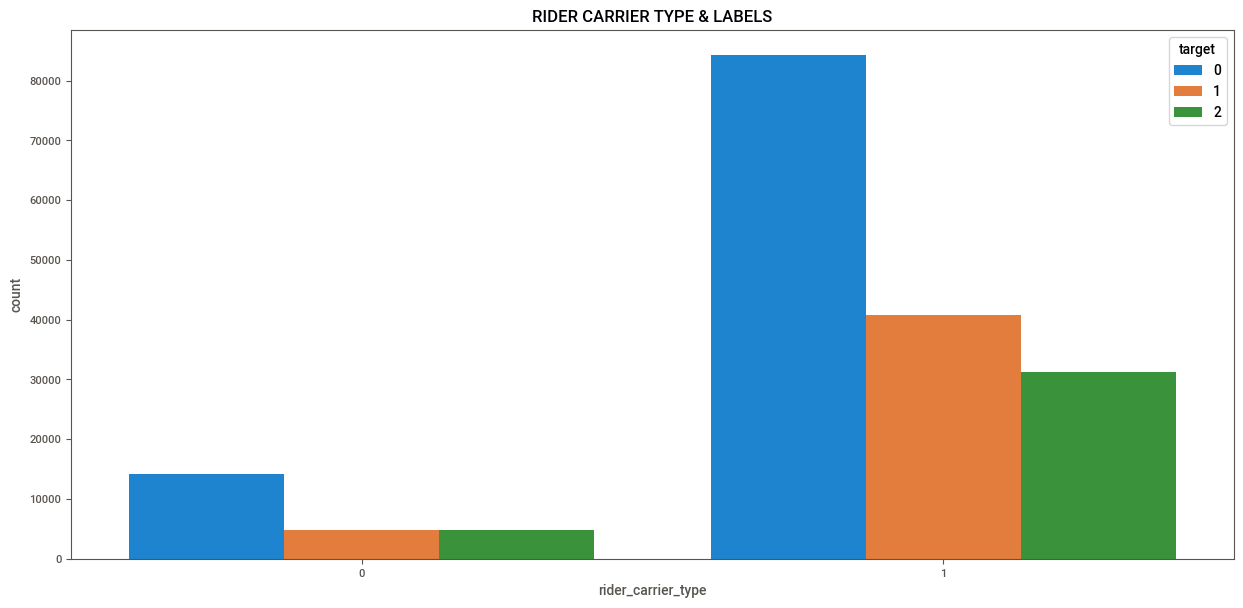

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'rider_carrier_type', hue = 'target', data = df)
plt.title('RIDER CARRIER TYPE & LABELS')
plt.show()

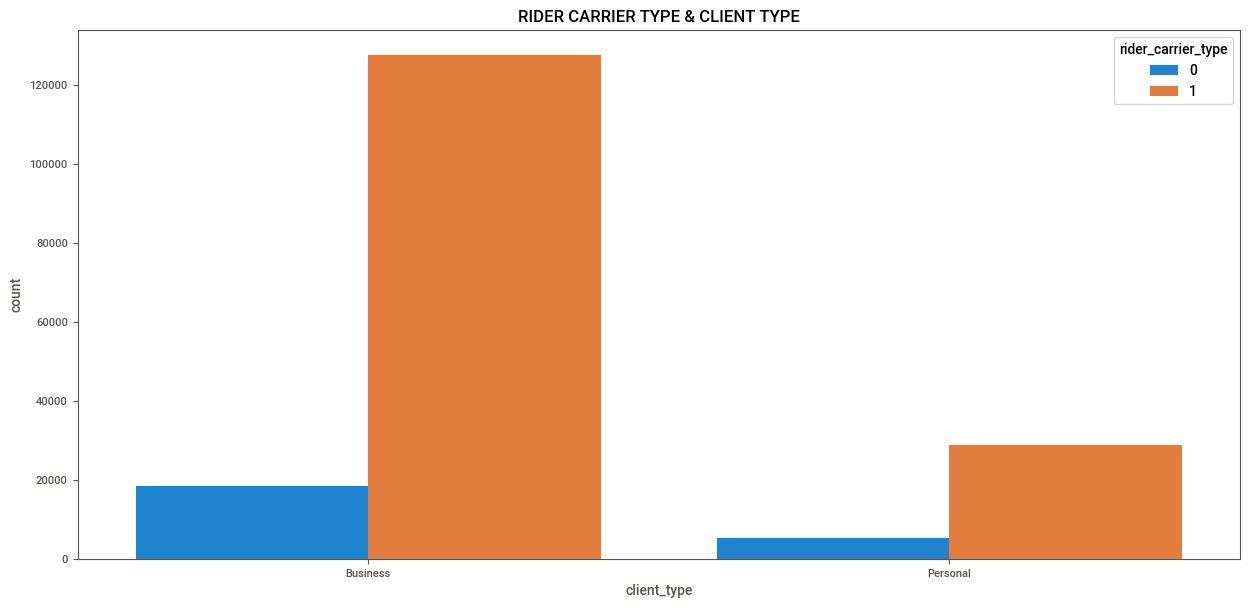

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'client_type', hue = 'rider_carrier_type', data = df)
plt.title('RIDER CARRIER TYPE & CLIENT TYPE')
plt.show()

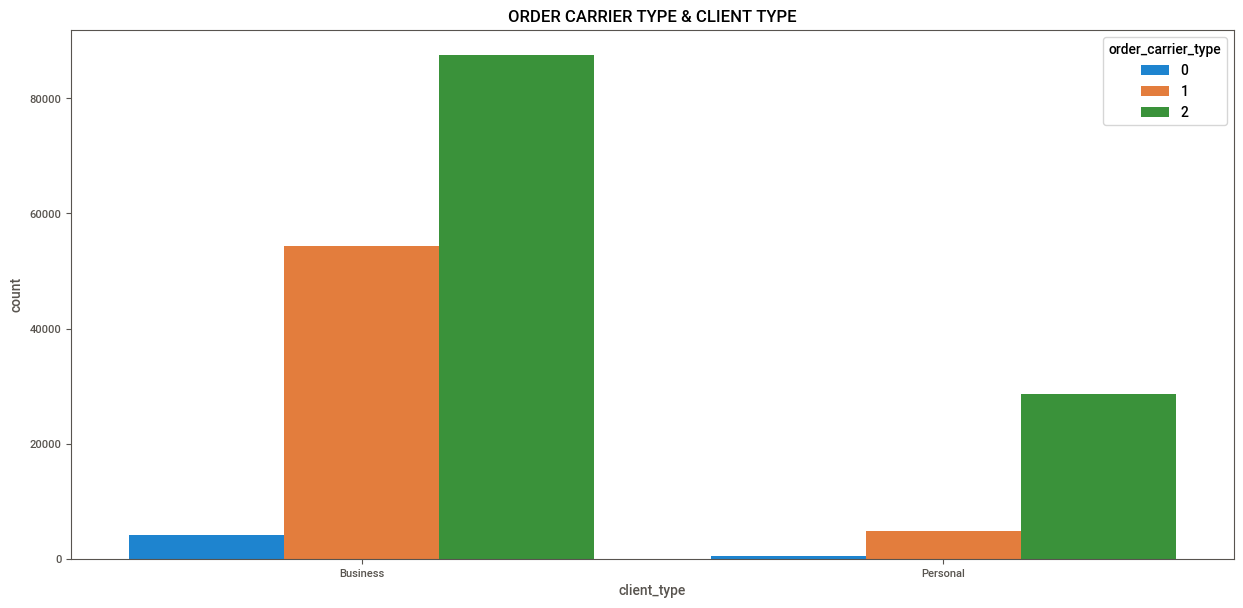

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'client_type', hue = 'order_carrier_type', data = df)
plt.title('ORDER CARRIER TYPE & CLIENT TYPE')
plt.show()

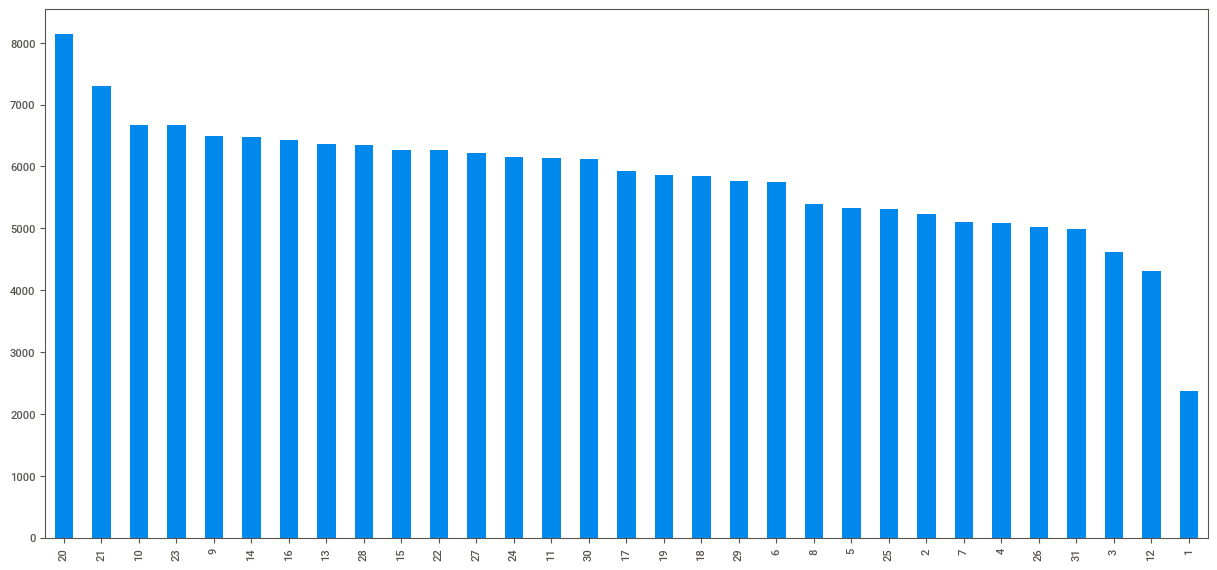

In [29]:
#Continuous and Catergorical Variables
#Days of the Month vs Value Count
df['dispatch_day'].value_counts().plot(kind='bar',figsize=[15,7])
plt.show()

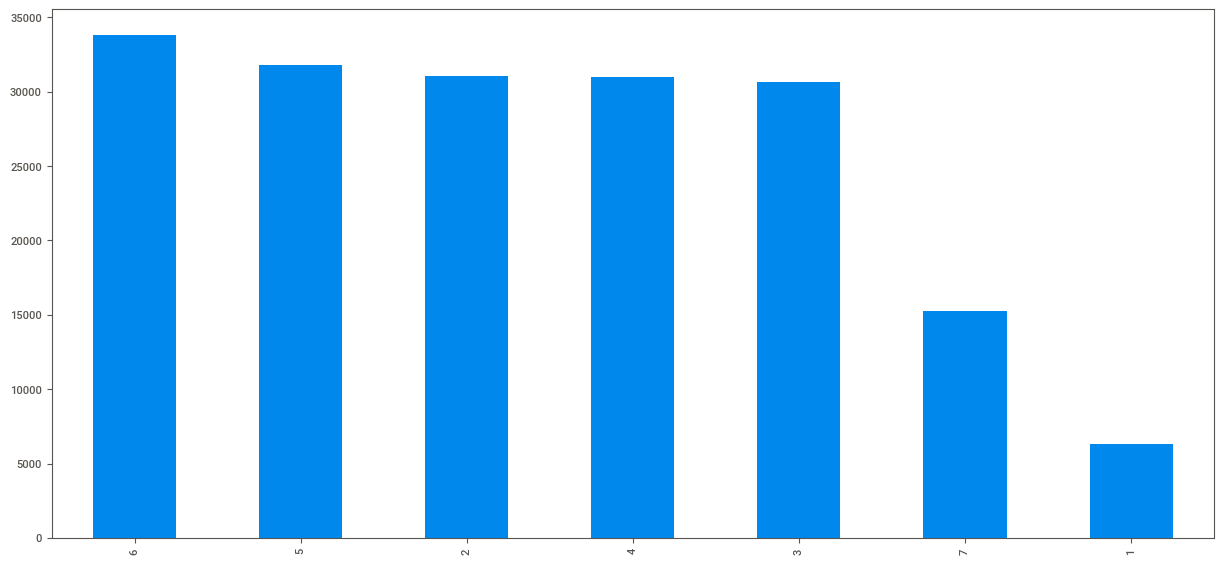

In [30]:
#Days of the Week vs Value Count
df['dispatch_day_of_week'].value_counts().plot(kind='bar',figsize=[15,7])
plt.show()

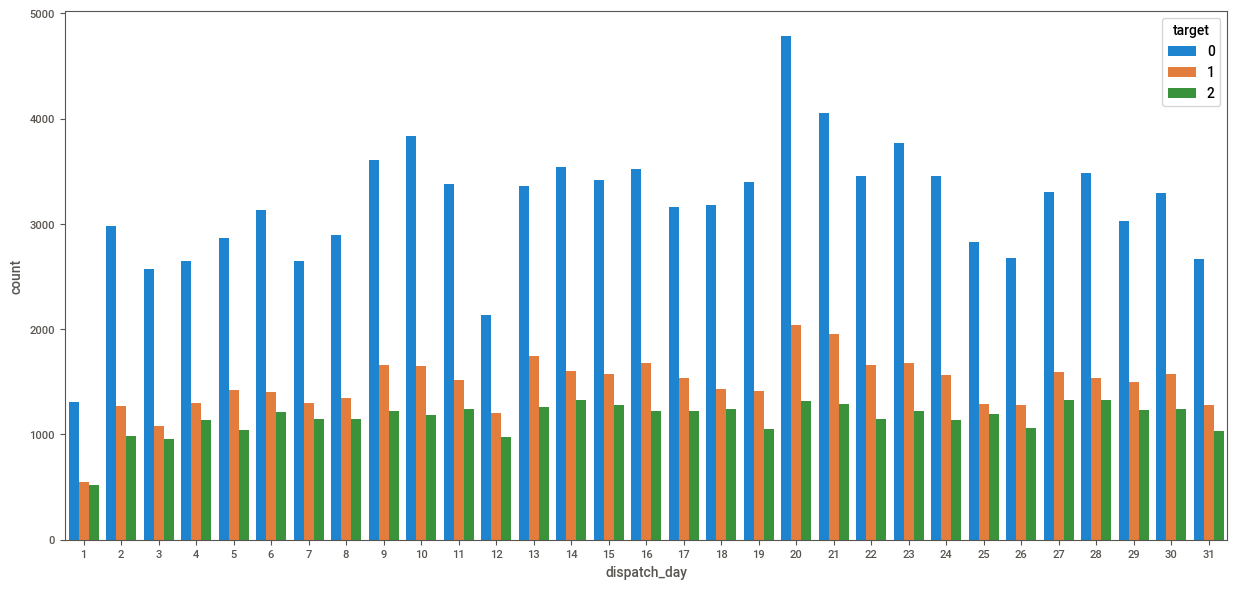

In [31]:
#Dispatch Day vs Target ~ Days of the Month
plt.figure(figsize=(15,7))
sns.countplot(x = 'dispatch_day', hue = 'target', data = df)
plt.show()

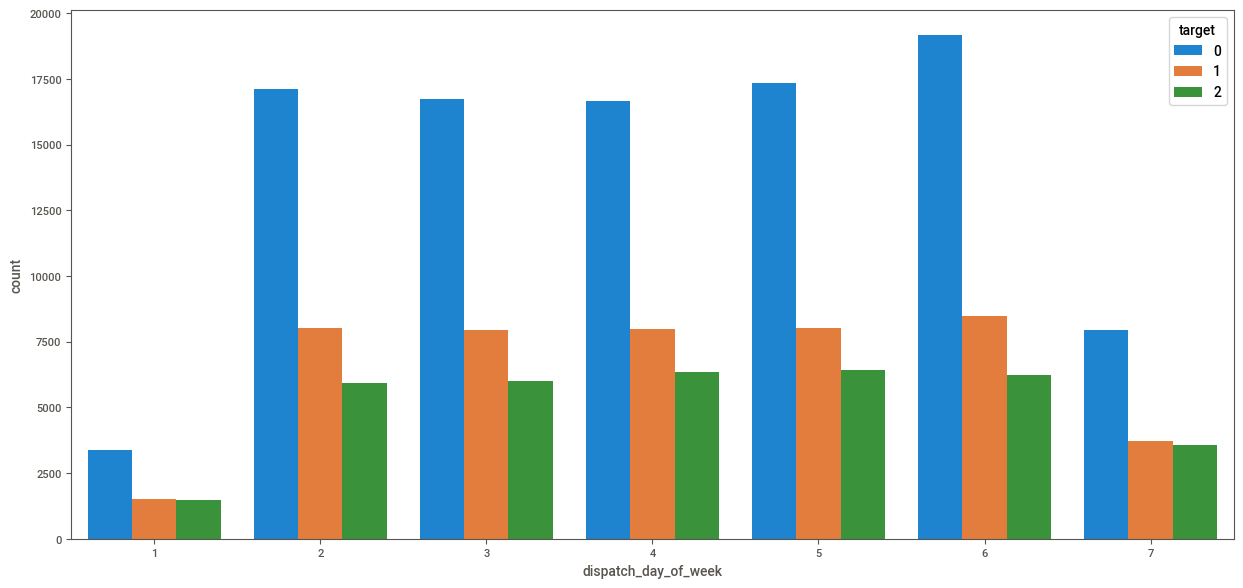

In [32]:
##Dispatch Day vs Target ~ Days of the Week
plt.figure(figsize=(15,7))
sns.countplot(x = 'dispatch_day_of_week', hue = 'target', data = df)
plt.show()

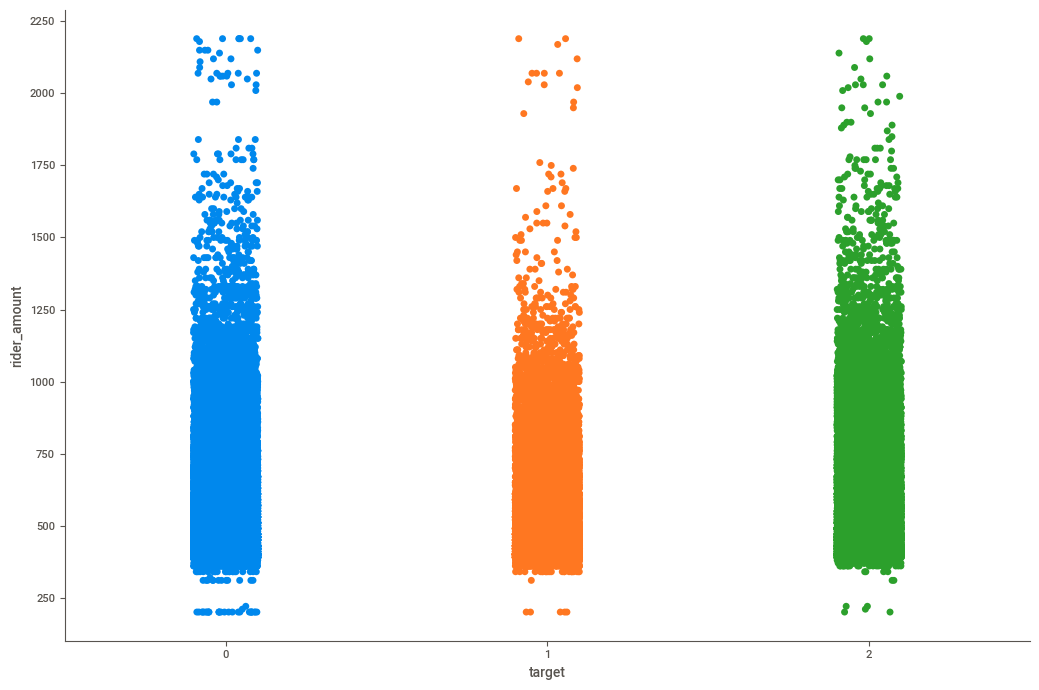

In [34]:
#Amount the Rider get vs Target / Reaction
target_rider_amount = sns.catplot(x="target", y="rider_amount",data=df, aspect=1.5, height=7, ci=80.0)

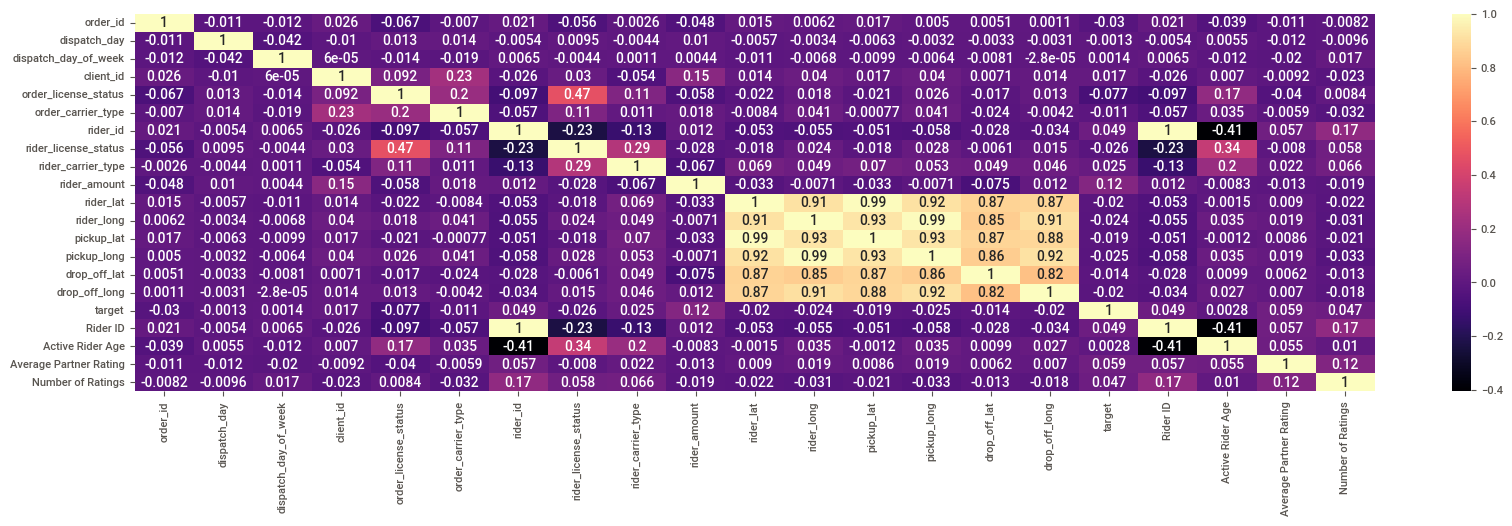

In [36]:
#Correlation HeatMap
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(), annot=True ,cmap="magma")
plt.show()

In [37]:
# Saving the dataset for further study of features
df.to_csv("C:/Users/keonyango/Sendy Case Study/Combined_data.csv",index=False)